In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'src/')
import acs5
import nyserda_acs
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
# Importing Data 
df=nyserda_acs.merging_data()

In [5]:
county_names = {'001': 'Albany', '003': 'Allegany', '005': 'Bronx', '007': 'Broome' , '009':'Cattaraugus', 
                '011': 'Gayuga', '013': 'Chautauqua', '015':'Chemung' , '017': 'Chenango',
                '019': 'Clinton', '021': 'Columbia', '023': 'Cortland' , '025':'Delaware', 
                '027': 'Dutchess', '029': 'Erie' , '031': 'Essex', '033': 'Franklin', '035':'Fulton' ,
                '037':'Genesee', '039':'Greene', '041': 'Hamilton', '043': 'Herkimer' , 
                '045':'Jefferson', '047': 'Kings', '049':'Lewis', '051':'Livingston', '053':'Madison',
                '055':'Monroe', '057':'Montgomery','059':'Nassau', '061':'New York', '063':'Niagara', 
                '065':'Oneida', '067':'Onondaga', '069':'Ontario', '071':'Orange', '073':'Orleans', 
                '075':'Oswego', '077': 'Otsego', '079':'Putnam', '081':'Queens', '083':'Rensselaer', 
                '085':'Richmond', '087':'Rockland', '089':'St. Lawrence','091':'Saratoga', 
                '093':'Schenectady', '095':'Schoharie' , '097':'Schuyler', '099':'Seneca', '101':'Steuben', 
                '103':'Suffolk', '105':'Sullivan', '107':'Tioga','109':'Tompkins', '111':'Ulster', 
                '113':'Warren', '115':'Washington', '117':'Wayne', '119':'Westchester', 
                '121':'Wyoming', '123':'Yates'}

In [6]:
zones = {'A': ['Chautauquia', 'Cataraugus', 'Erie', 'Niagara', 'Orleans', 'Genesee', 'Wyoming', 'Livingston'], 
        'B': ['Allegany', 'Monroe', 'Wayne', 'Ontario'], 
        'C': ['Steuben', 'Yates', 'Seneca', 'Cayuga', 'Schuyler', 'Chemung','Tioga', 'Tompkins', 'Cortland',
               'Broome'],
        'D': ['Clinton'],
        'E': ['Jefferson', 'St. Lawrence', 'Franklin', 'Lewis', 'Oneida', 'Herkimer', 'Madison', 'Ostego',
             'Chenango', 'Delaware', 'Sullivan'], 
        'F': ['Essex', 'Hamilton', 'Warren', 'Washington', 'Saratoga', 'Fulton', 'Montgomery', 'Shenectady', 
             'Schiharie', 'Albany', 'Renselaer', 'Columbia'],
         'G': ['Greene', 'Dutchess', 'Ulster', 'Orange', 'Putman', 'Rockland'],
         'H': ['Westchester'],
         'J': ['Bronx', 'Kings', 'Queens', 'New York', 'Bronx'],
         'K': ['Nassau', 'Suffolk'] }

In [7]:
#Identifying tracts with population = 0 
zero_pop = df[df['Total_population']==0]
# Census tracts with population = 0 are parks and other public areas http://maps.nyc.gov/census/

In [8]:
zero_pop.shape

(61, 110)

In [9]:
# Dropping tracts with no population for EDA
acs = df.loc[df['Total_population']>0,:]

In [10]:
#Creating percentage data 
income = ['Less_10k','10k_15k','15k_25k','25k_35k','35k_50k','50k_75k','75k_100k',
          '100k_150k','150k_200k','200k_more']
income_percent = []
for i in income:
    income_percent.append('Percent_{}'.format(i))
    acs.loc[:,'Percent_{}'.format(i)]=acs.loc[:, i]/acs.loc[:,'households']
    

/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
education = ['Less_9th', '12th_no_dip','HighSchool', 
             'Some_college','Associate', 'Bachelors','Graduate']
education_percent = []
for i in education:
    education_percent.append('Percent_{}'.format(i))
    acs.loc[:,'Percent_{}'.format(i)]=acs.loc[:,i]/acs.loc[:,'Pop_over_25']
    

In [12]:
acs.loc[:,'Percent_hh_w_children']=acs.loc[:,'Hh_w_children']/acs.loc[:,'Total_households_by_type']

In [13]:
acs.loc[:,'Percent_occupied'] = acs.loc[:,'Occupied_units']/acs.loc[:,'Housing_Units']

In [14]:
units = ['1_unit_detached','1_unit_attached','2_units',
       '3_4_units','5_9_units','10_19_units','20+_units']
units_percent = []
for i in units:
    units_percent.append('Percent_{}'.format(i))
    acs.loc[:,'Percent_{}'.format(i)]=acs.loc[:,i]/acs.loc[:,'Total_units_structure']

In [15]:
rooms = ['1_room','2_rooms','3_rooms','4_rooms','5_rooms','6_rooms','7_rooms','8_rooms','9_more_rooms']
rooms_percent = []
for i in rooms:
    rooms_percent.append('Percent_{}'.format(i))
    acs.loc[:,'Percent_{}'.format(i)]=acs.loc[:,i]/acs.loc[:,'Total_housing_units_Rooms']

In [16]:
heating = ['Heating_gas','Heating_gas_tank','Heating_electricity','Heating_fuelkero',
           'Heating_coal_coke','Heating_wood','Heating_solar','Heating_other','Heating_no']
heating_percent = []
for i in heating:
    heating_percent.append('Percent_{}'.format(i))
    acs.loc[:,'Percent_{}'.format(i)]=acs.loc[:,i]/acs.loc[:,'Occupied_units_heating']

In [18]:
#Creating new dataframe with only positive cases
temp = acs.loc[acs['Project_yes']==1,:]
#Creating weights for negative class in positive cases
temp.loc[:,'Project_yes'] ==0
temp.loc[:,'weight'] = temp.loc[:,'households']-temp.loc[:,'Project_Number']
#Creating weights for positive class
temp2 = acs.loc[acs['Project_yes']==1,:]
temp2.loc[:,'weight']=temp2.loc[:,'Project_Number']
#Creating weights for negative classe
temp3 =acs.loc[acs['Project_yes']==0,:]
temp3.loc[:,'weight']=temp3.loc[:,'households']
#Concatenating
acs = temp.append(temp2.append(temp3, ignore_index=True), ignore_index=True)

In [19]:
acs.shape

(6052, 155)

## Education

In [20]:
all_educ = education+education_percent
all_educ.append('Project_Number')
all_educ.append('more_than_hs%')

In [21]:
acs[all_educ].corr()

,Less_9th,12th_no_dip,HighSchool,Some_college,Associate,Bachelors,Graduate,Percent_Less_9th,Percent_12th_no_dip,Percent_HighSchool,Percent_Some_college,Percent_Associate,Percent_Bachelors,Percent_Graduate,Project_Number,more_than_hs%
Less_9th,1.000000,0.715702,0.328806,0.226860,0.018229,0.032230,-0.112112,0.813600,0.433745,0.008531,-0.163590,-0.274629,-0.237234,-0.313706,0.035980,-0.473176
12th_no_dip,0.715702,1.000000,0.538334,0.400089,0.197697,-0.041335,-0.177497,0.512530,0.708289,0.206933,-0.005831,-0.134579,-0.416914,-0.447051,-0.045579,-0.573738
HighSchool,0.328806,0.538334,1.000000,0.758283,0.676214,0.102336,-0.046501,0.031856,0.101621,0.521709,0.165483,0.193345,-0.378287,-0.396385,0.073883,-0.372499
Some_college,0.226860,0.400089,0.758283,1.000000,0.707135,0.363880,0.234982,-0.117417,-0.085555,0.098580,0.390466,0.163575,-0.123404,-0.138316,0.147034,0.014035
Associate,0.018229,0.197697,0.676214,0.707135,1.000000,0.278329,0.172656,-0.261722,-0.201546,0.138542,0.162511,0.611735,-0.100893,-0.111643,0.063878,0.085602
Bachelors,0.032230,-0.041335,0.102336,0.363880,0.278329,1.000000,0.873465,-0.234161,-0.423466,-0.560072,-0.326402,-0.202253,0.686095,0.539513,0.112022,0.586566
Graduate,-0.112112,-0.177497,-0.046501,0.234982,0.172656,0.873465,1.000000,-0.324798,-0.477529,-0.615975,-0.347358,-0.218817,0.617799,0.749203,0.083403,0.675491
Percent_Less_9th,0.813600,0.512530,0.031856,-0.117417,-0.261722,-0.234161,-0.324798,1.000000,0.592047,0.076513,-0.183025,-0.328622,-0.353614,-0.437414,0.006279,-0.643045
Percent_12th_no_dip,0.433745,0.708289,0.101621,-0.085555,-0.201546,-0.423466,-0.477529,0.592047,1.000000,0.332445,0.029861,-0.155583,-0.603539,-0.611987,-0.144247,-0.783670
Percent_HighSchool,0.008531,0.206933,0.521709,0.098580,0.138542,-0.560072,-0.615975,0.076513,0.332445,1.000000,0.302564,0.264934,-0.759628,-0.760951,-0.095200,-0.767539


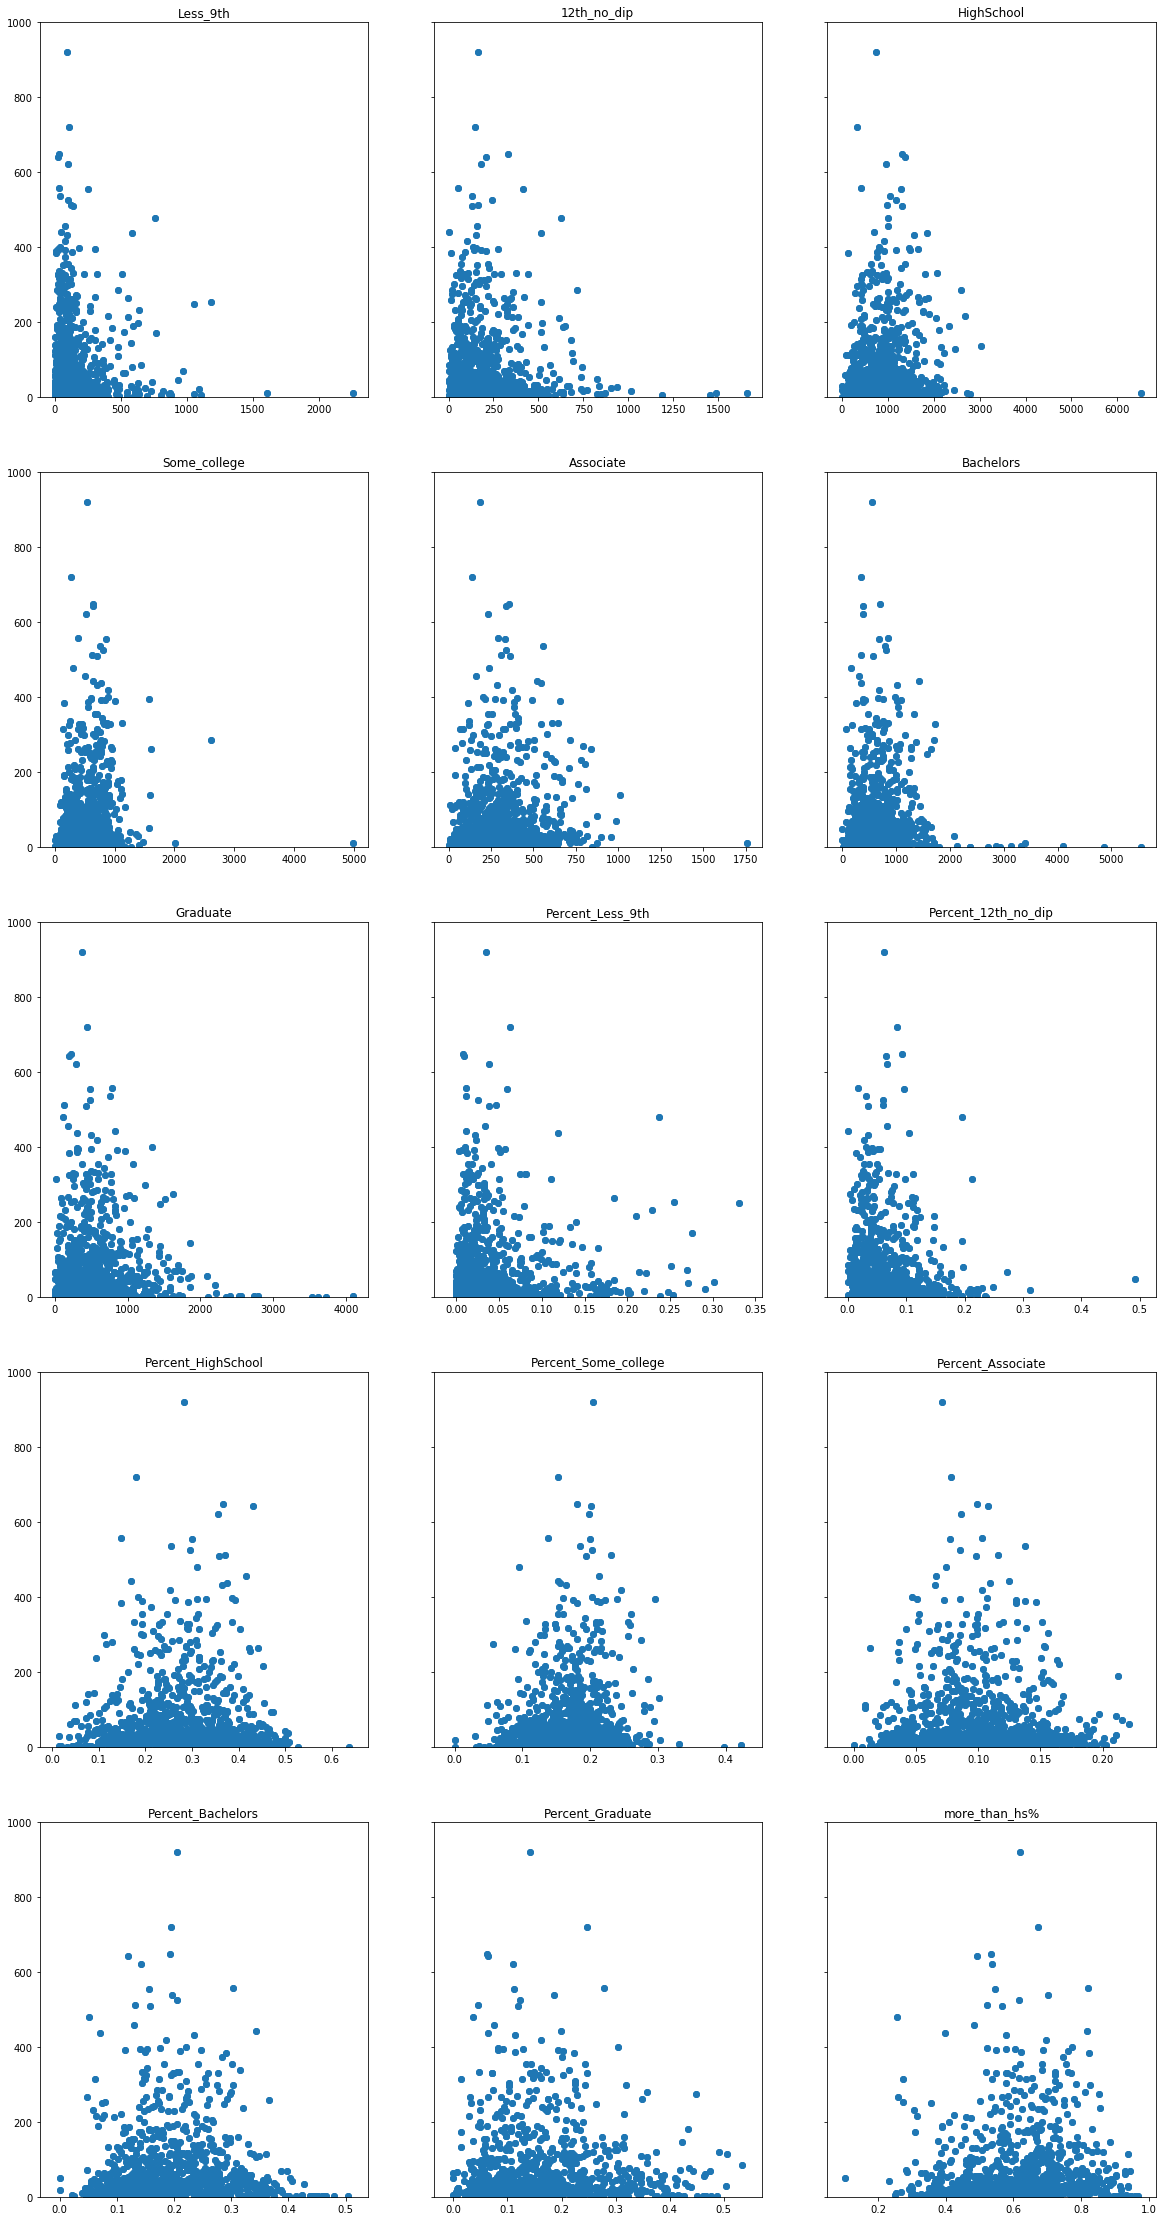

In [22]:
all_educ.remove('Project_Number')
fig, axs = plt.subplots(nrows=5, ncols= 3, sharey=True ,figsize=(20,40))

for i, ax in enumerate(axs.flatten()):
    column = all_educ[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

In [23]:
temp = acs[acs['Project_yes']==0]
temp1 = acs[acs['Project_yes']==1]

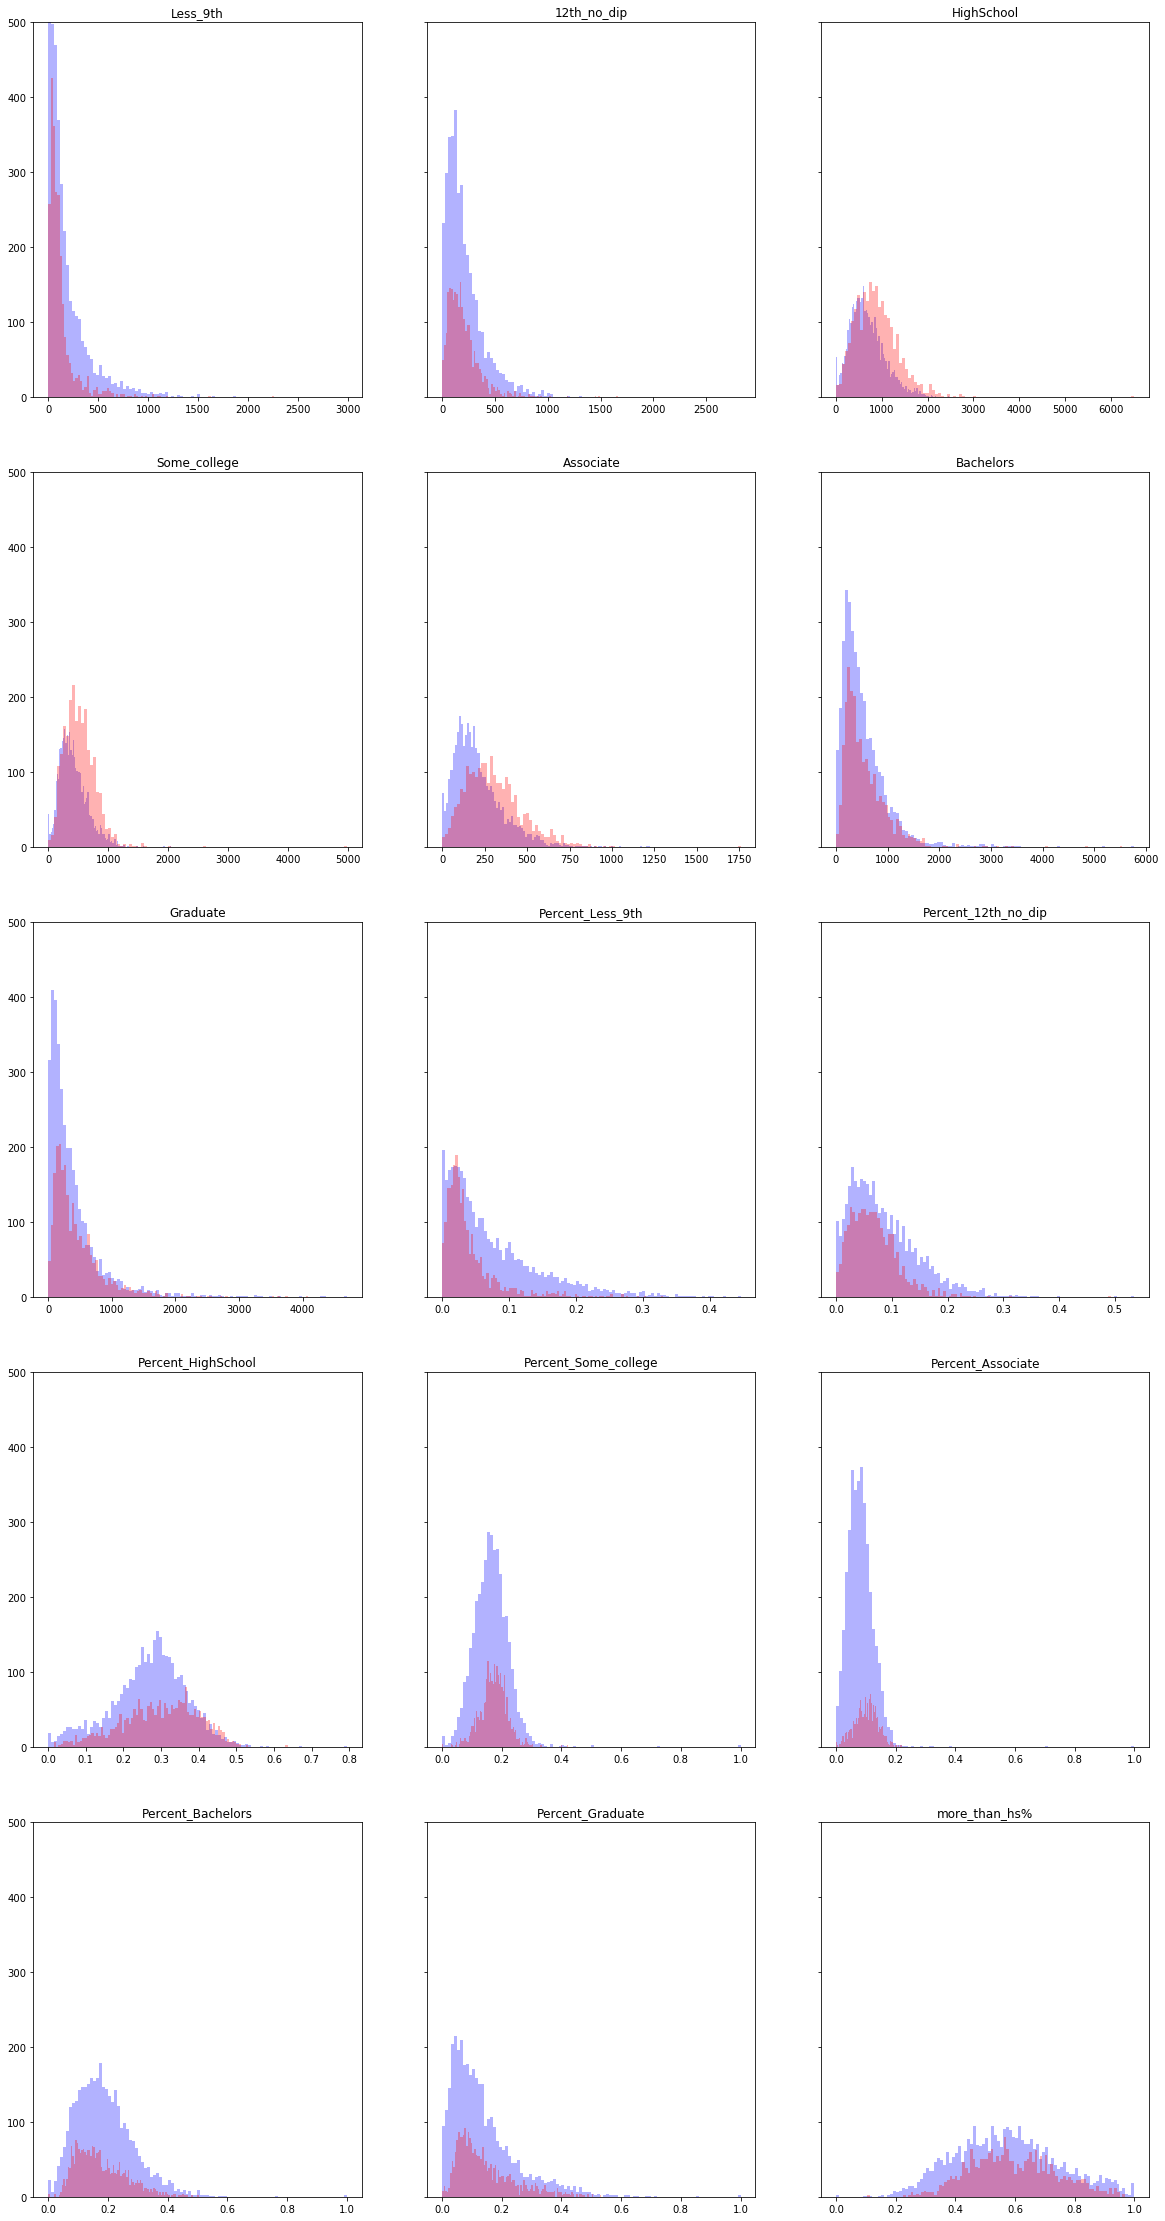

In [24]:
fig, axs = plt.subplots(nrows=5, ncols= 3, sharey=True ,figsize=(20,40))

for i, ax in enumerate(axs.flatten()):
    column = all_educ[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,500);

## Income

In [25]:
all_income = income+income_percent
all_income.append('Project_Number')
all_income.append('Median_income')
all_income.append('Mean_income')
all_income.append('less_35k_%')

In [26]:
acs[all_income].corr()['Project_Number']

Less_10k            -0.111444
10k_15k             -0.140690
15k_25k             -0.156372
25k_35k             -0.124947
35k_50k             -0.105325
50k_75k             -0.048443
75k_100k             0.097521
100k_150k            0.237351
150k_200k            0.311592
200k_more            0.086784
Percent_Less_10k    -0.142053
Percent_10k_15k     -0.186368
Percent_15k_25k     -0.266607
Percent_25k_35k     -0.235396
Percent_35k_50k     -0.222089
Percent_50k_75k     -0.174146
Percent_75k_100k     0.061875
Percent_100k_150k    0.320297
Percent_150k_200k    0.377640
Percent_200k_more    0.134572
Project_Number       1.000000
Median_income        0.251191
Mean_income          0.151273
less_35k_%          -0.270262
Name: Project_Number, dtype: float64

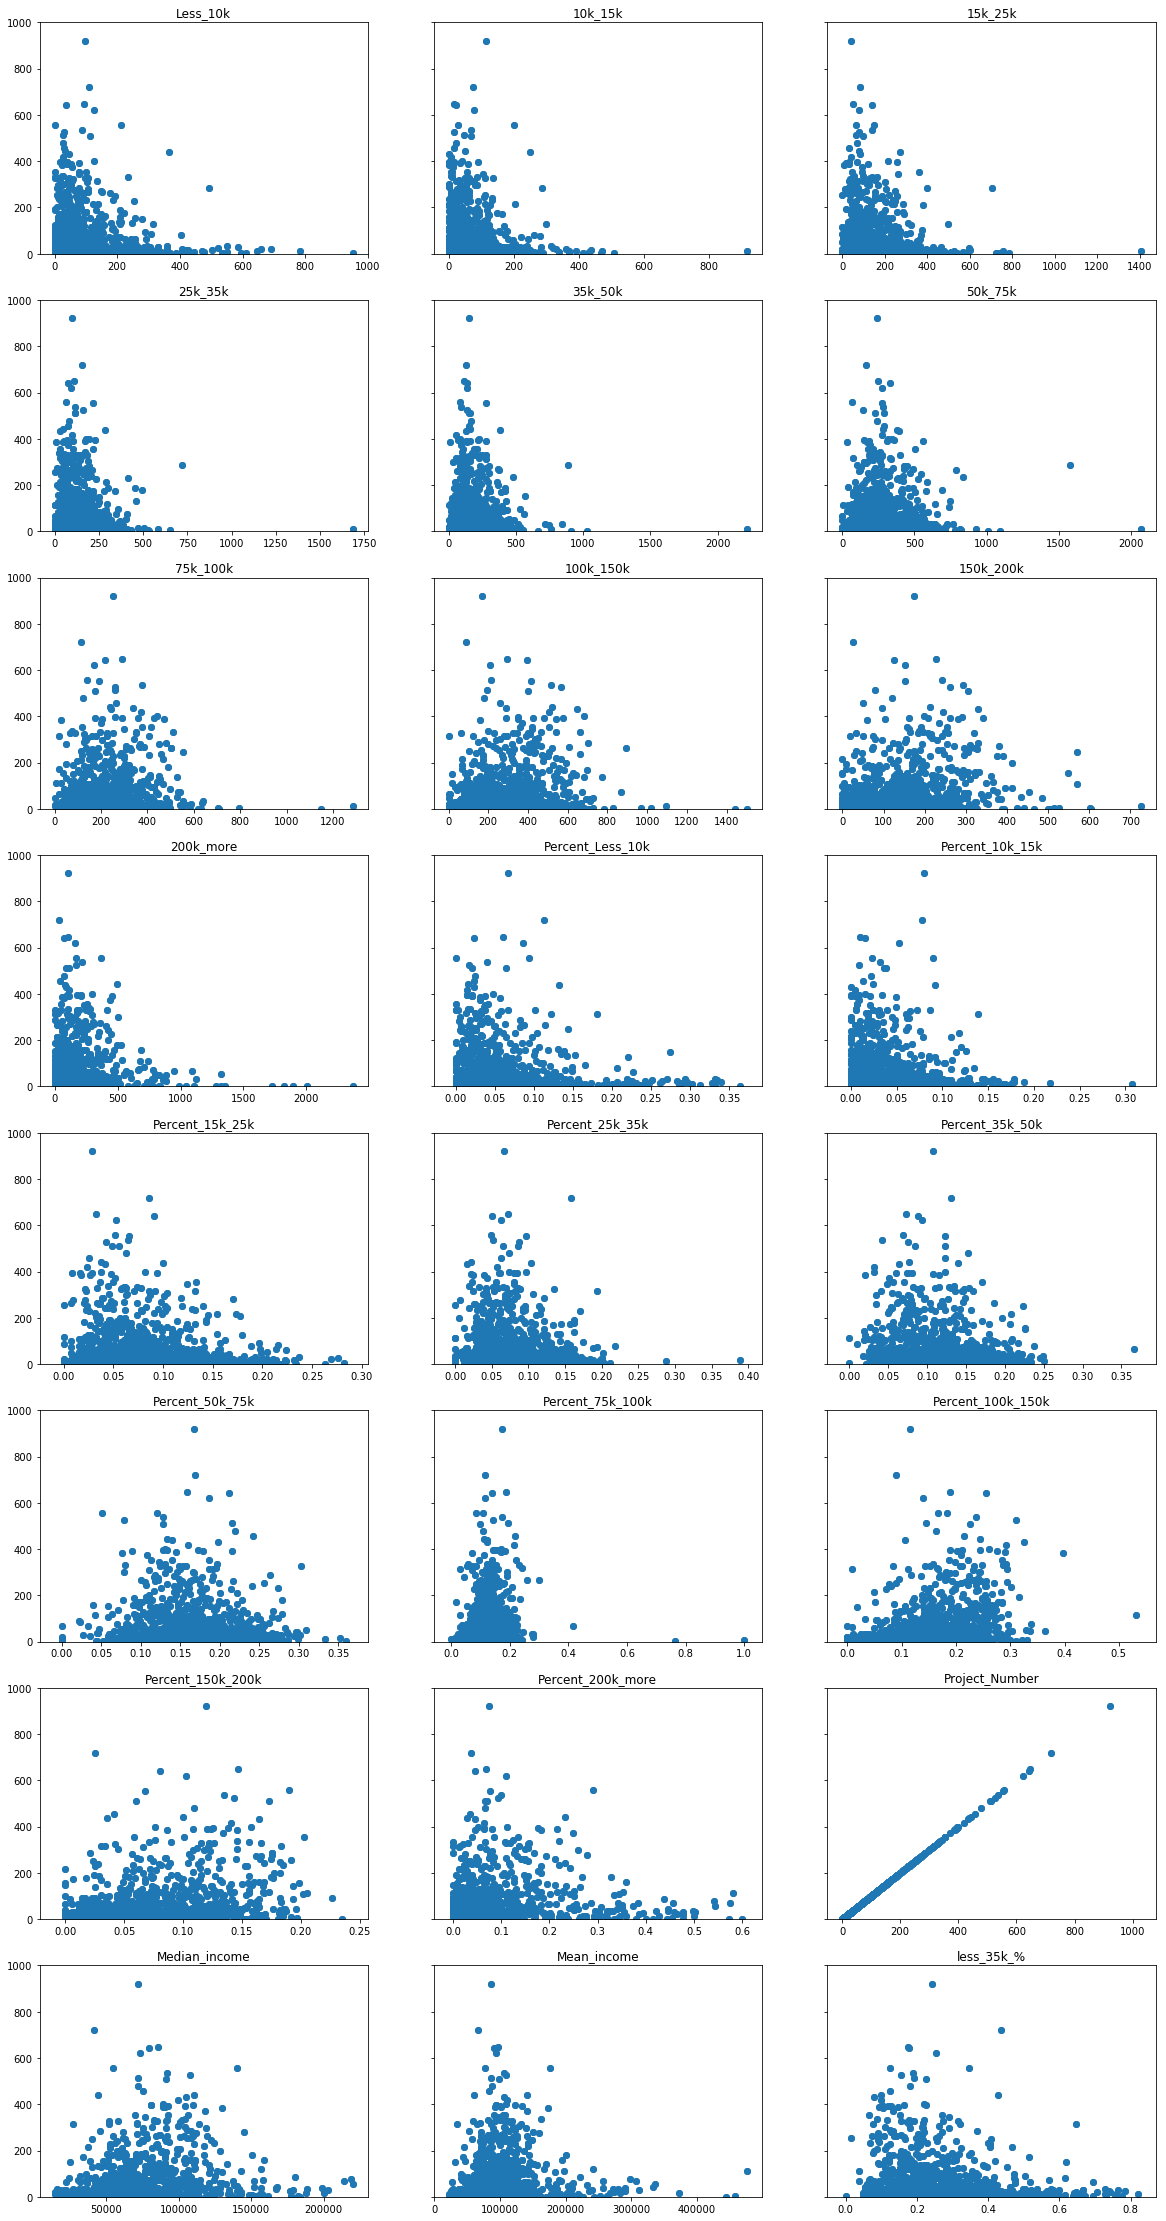

In [27]:
fig, axs = plt.subplots(nrows=8, ncols= 3, sharey=True ,figsize=(20,40))

for i, ax in enumerate(axs.flatten()):
    column = all_income[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

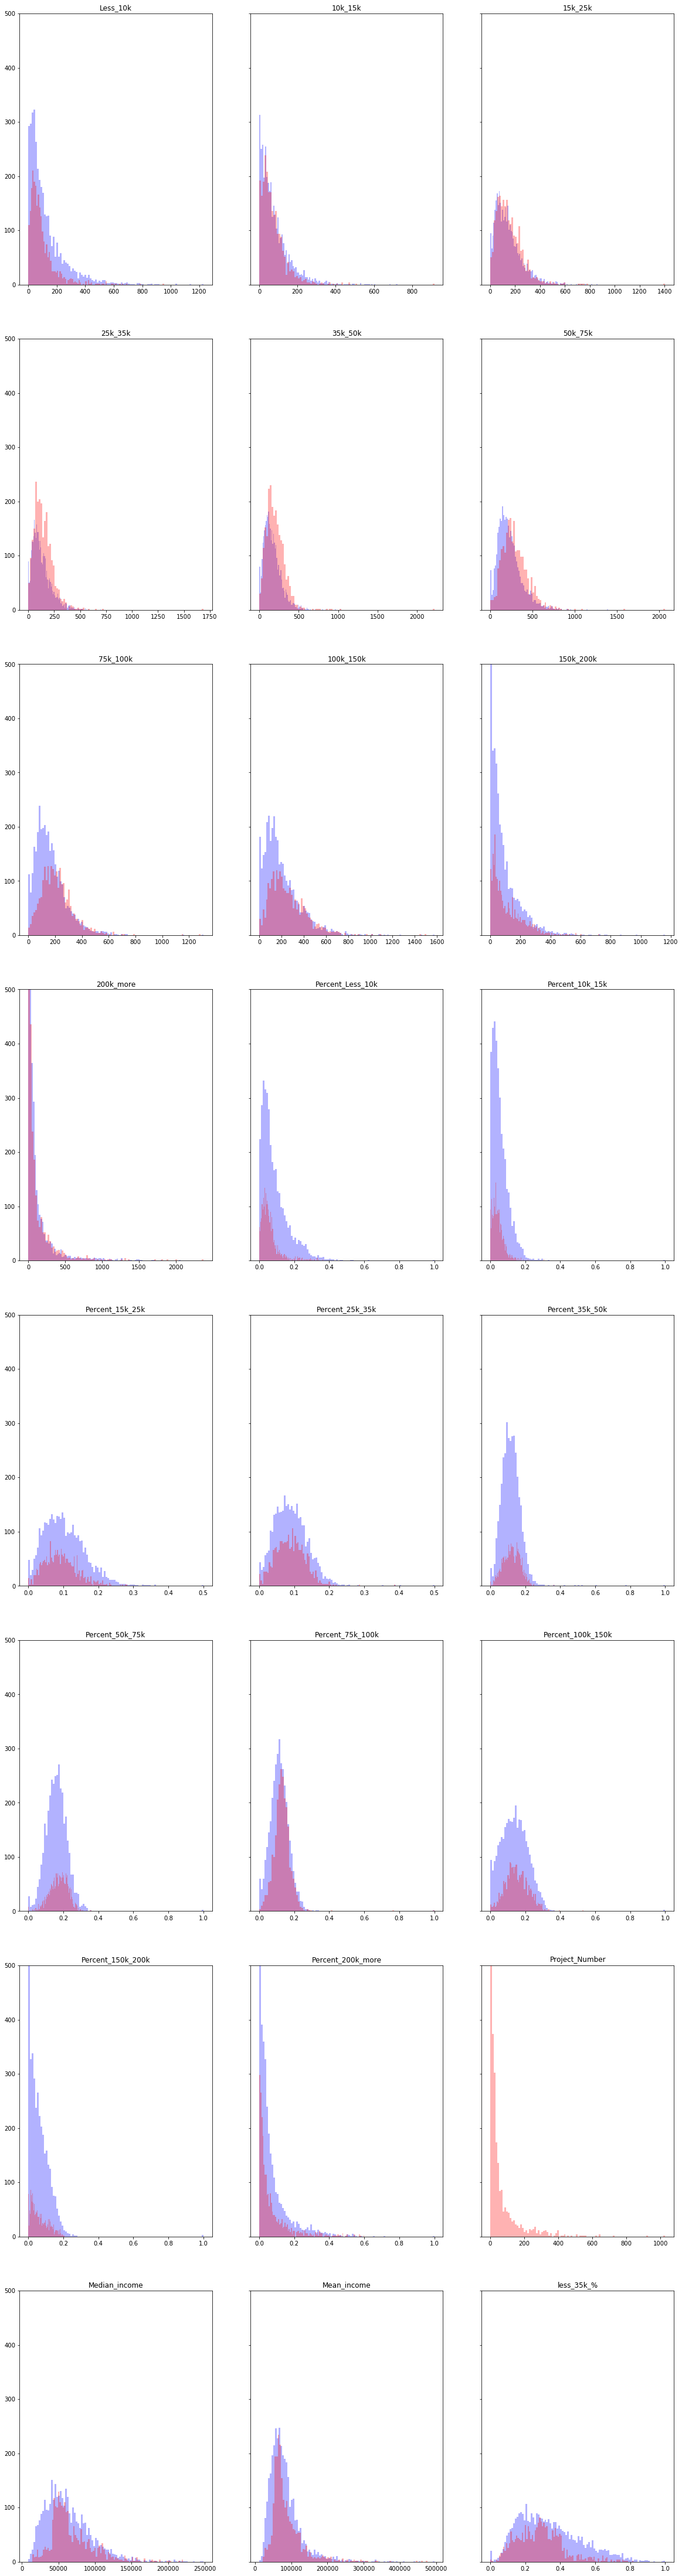

In [28]:

fig, axs = plt.subplots(nrows=8, ncols= 3, sharey=True ,figsize=(20,80))

for i, ax in enumerate(axs.flatten()):
    column = all_income[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,500);

## Other household

In [29]:
other_households= ['Avg_hh_size', 'Hh_w_children', 'Median_age', 'Percent_hh_w_children', 'Project_Number']

In [30]:
acs[other_households].corr()['Project_Number']

Avg_hh_size              0.294443
Hh_w_children            0.160879
Median_age              -0.027025
Percent_hh_w_children    0.204933
Project_Number           1.000000
Name: Project_Number, dtype: float64

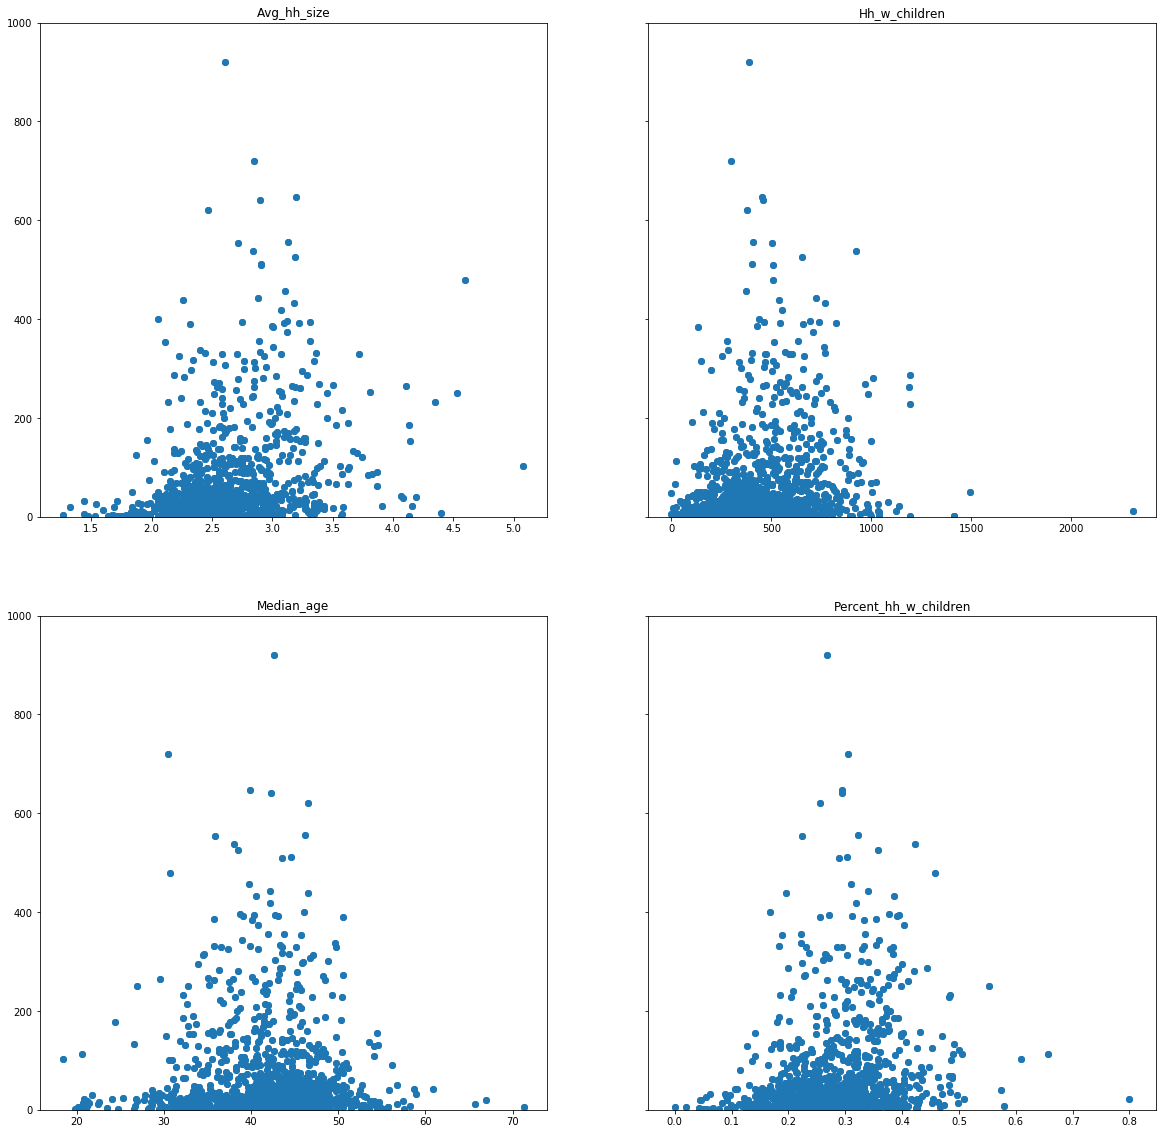

In [32]:
other_households.remove('Project_Number')
fig, axs = plt.subplots(nrows=2, ncols= 2, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = other_households[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

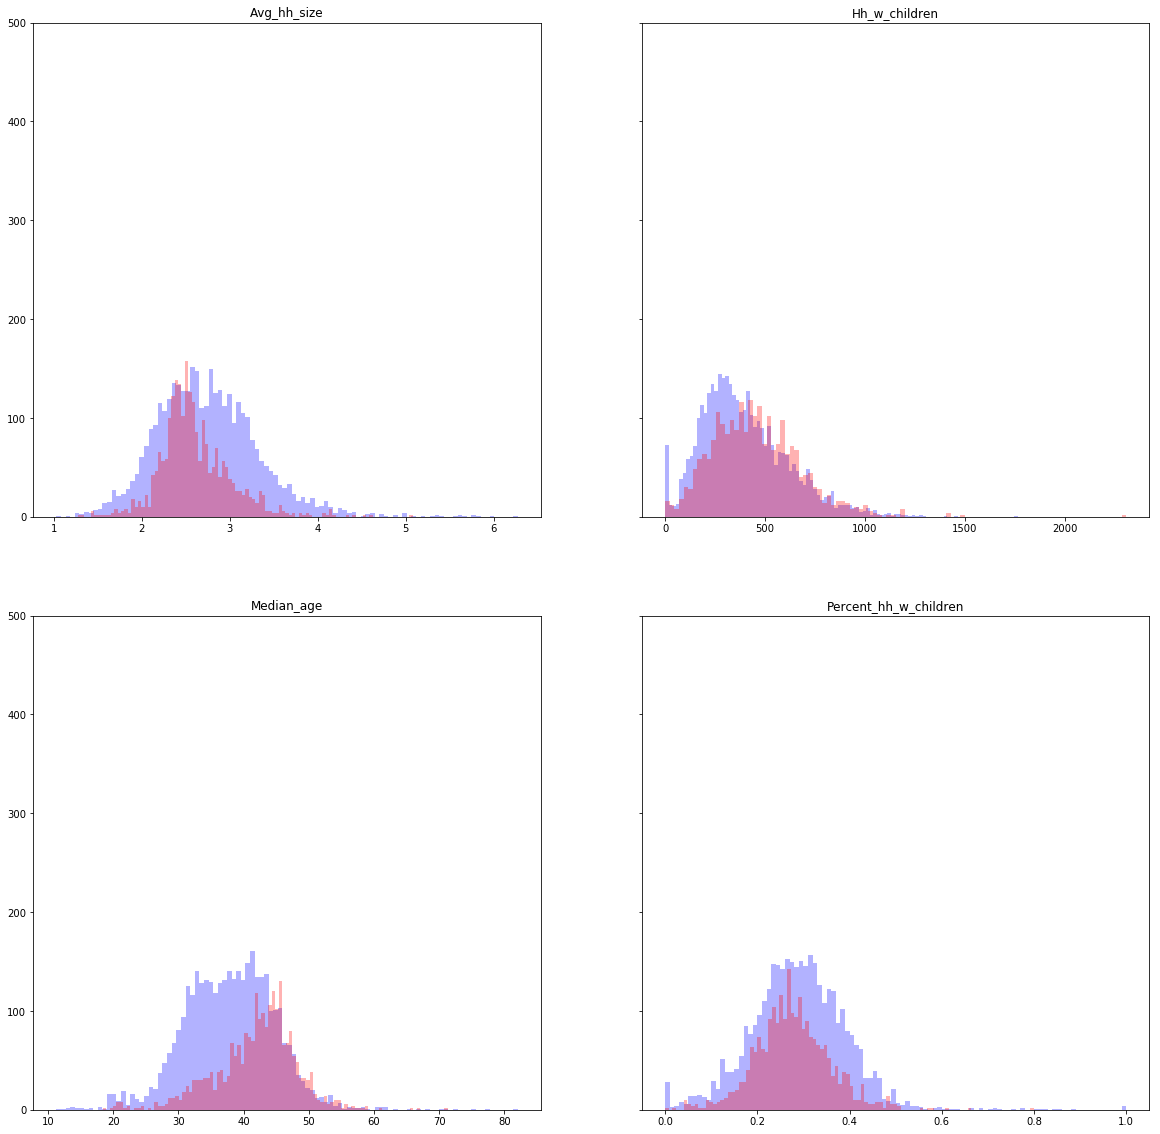

In [33]:

fig, axs = plt.subplots(nrows=2, ncols= 2, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = other_households[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,500);

## Units - Rooms

In [34]:
all_rooms = rooms+rooms_percent
all_rooms.append('Project_Number')
all_rooms.append('median_rooms')

In [35]:
acs[all_rooms].corr()['Project_Number']

1_room                 -0.101636
2_rooms                -0.085048
3_rooms                -0.076108
4_rooms                -0.135266
5_rooms                -0.111438
6_rooms                 0.081920
7_rooms                 0.135853
8_rooms                 0.160065
9_more_rooms            0.099560
Percent_1_room         -0.100877
Percent_2_rooms        -0.091684
Percent_3_rooms        -0.084806
Percent_4_rooms        -0.182494
Percent_5_rooms        -0.152741
Percent_6_rooms         0.120344
Percent_7_rooms         0.163952
Percent_8_rooms         0.184959
Percent_9_more_rooms    0.104780
Project_Number          1.000000
median_rooms            0.181784
Name: Project_Number, dtype: float64

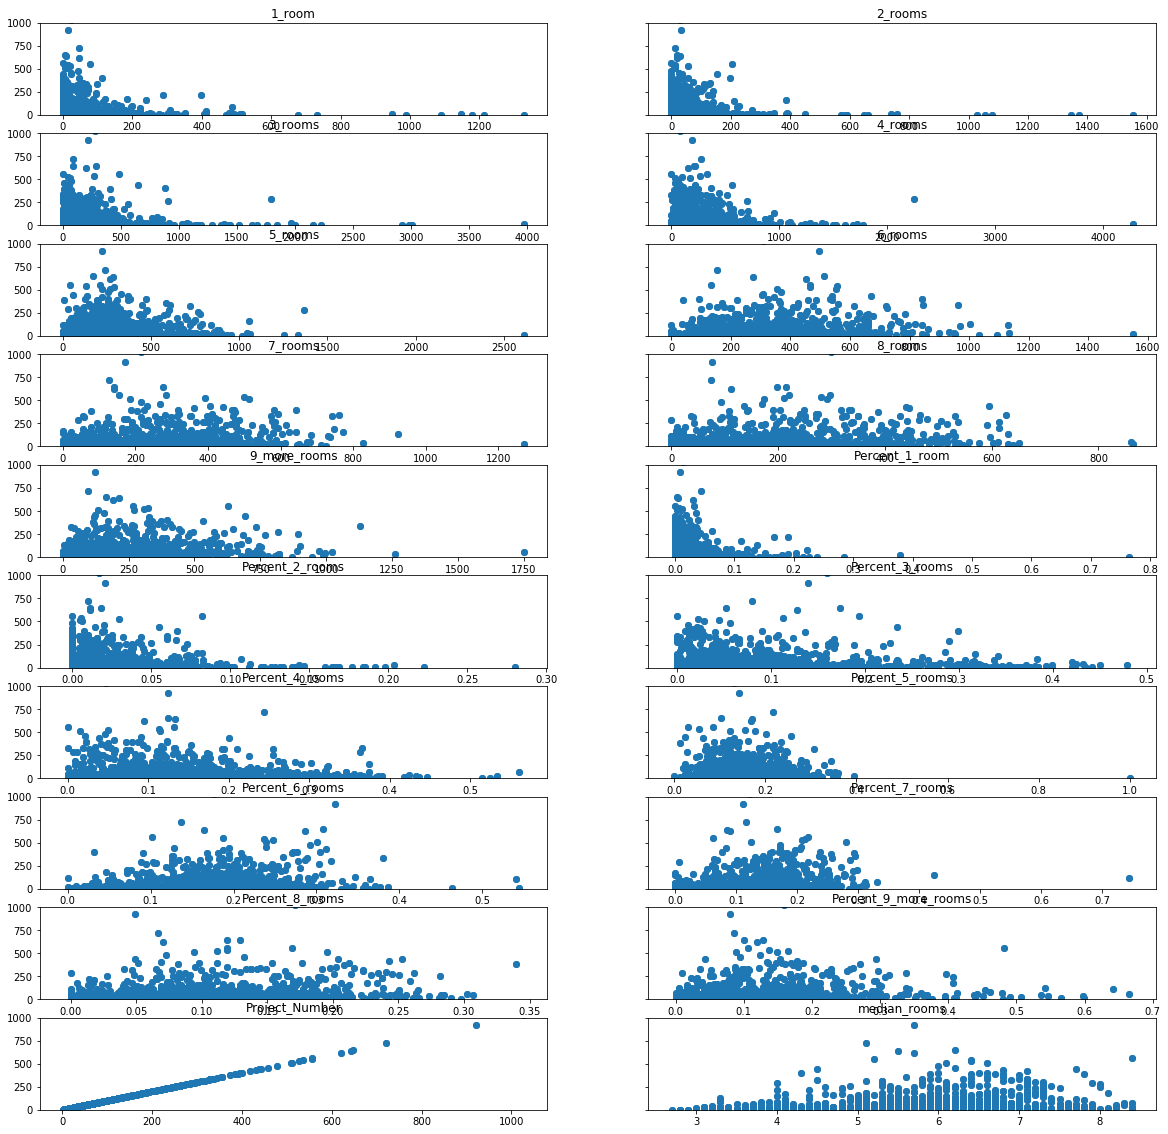

In [36]:
fig, axs = plt.subplots(nrows=10, ncols= 2, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = all_rooms[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

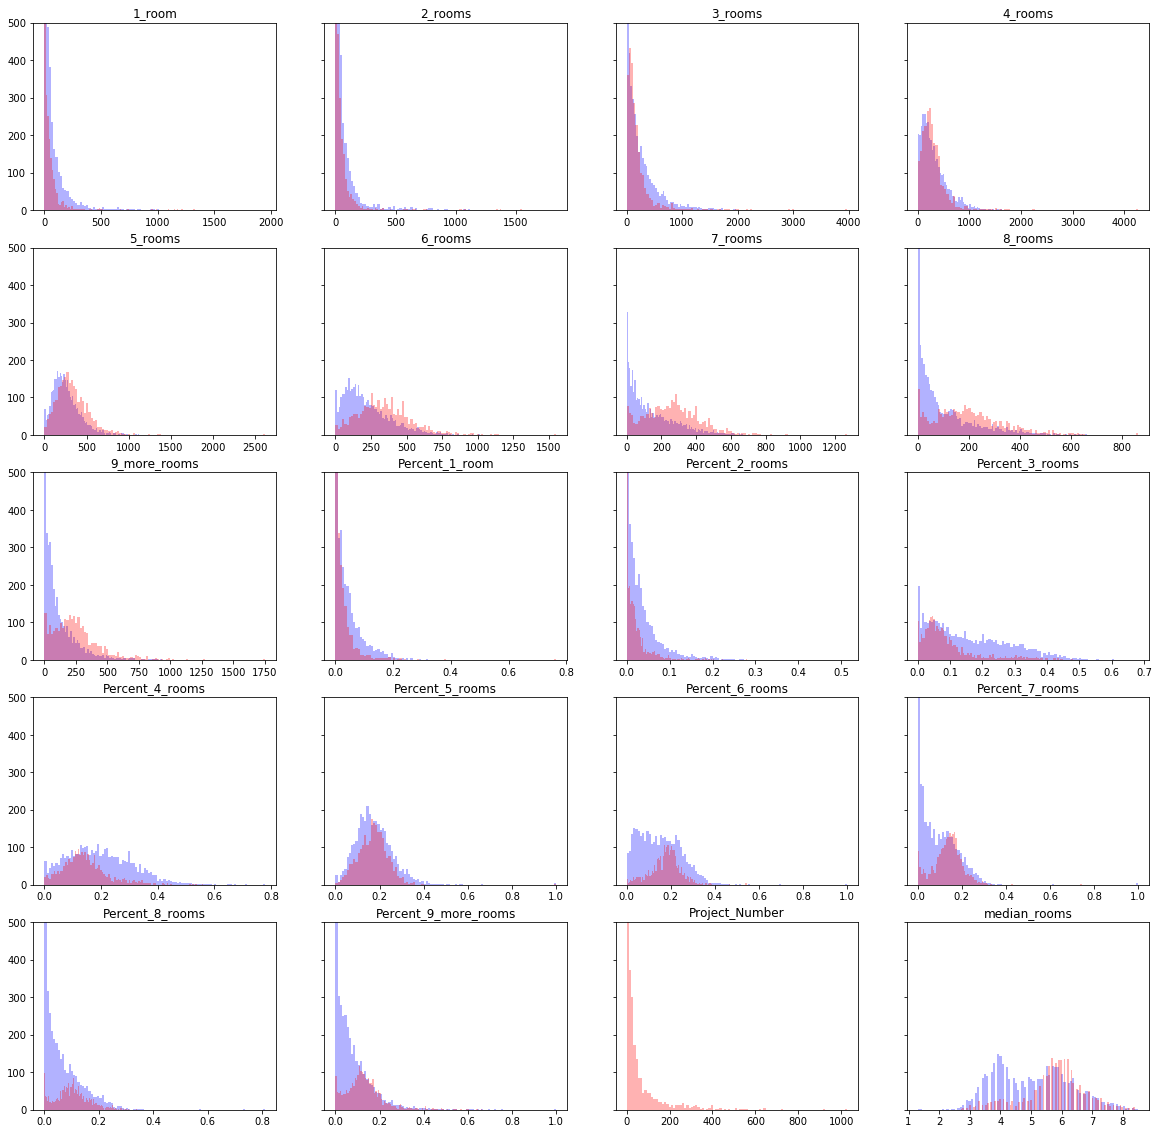

In [37]:

fig, axs = plt.subplots(nrows=5, ncols= 4, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = all_rooms[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,500);

## Units - Heating

In [38]:
all_heating = heating+heating_percent
all_heating.append('Project_Number')

In [39]:
acs[all_heating].corr()['Project_Number']

Heating_gas                    0.109697
Heating_gas_tank              -0.191527
Heating_electricity           -0.078634
Heating_fuelkero               0.114739
Heating_coal_coke             -0.151890
Heating_wood                  -0.234276
Heating_solar                 -0.005967
Heating_other                 -0.126971
Heating_no                    -0.057121
Percent_Heating_gas            0.118575
Percent_Heating_gas_tank      -0.235466
Percent_Heating_electricity   -0.126365
Percent_Heating_fuelkero       0.105611
Percent_Heating_coal_coke     -0.162875
Percent_Heating_wood          -0.259697
Percent_Heating_solar         -0.010311
Percent_Heating_other         -0.207451
Percent_Heating_no            -0.089304
Project_Number                 1.000000
Name: Project_Number, dtype: float64

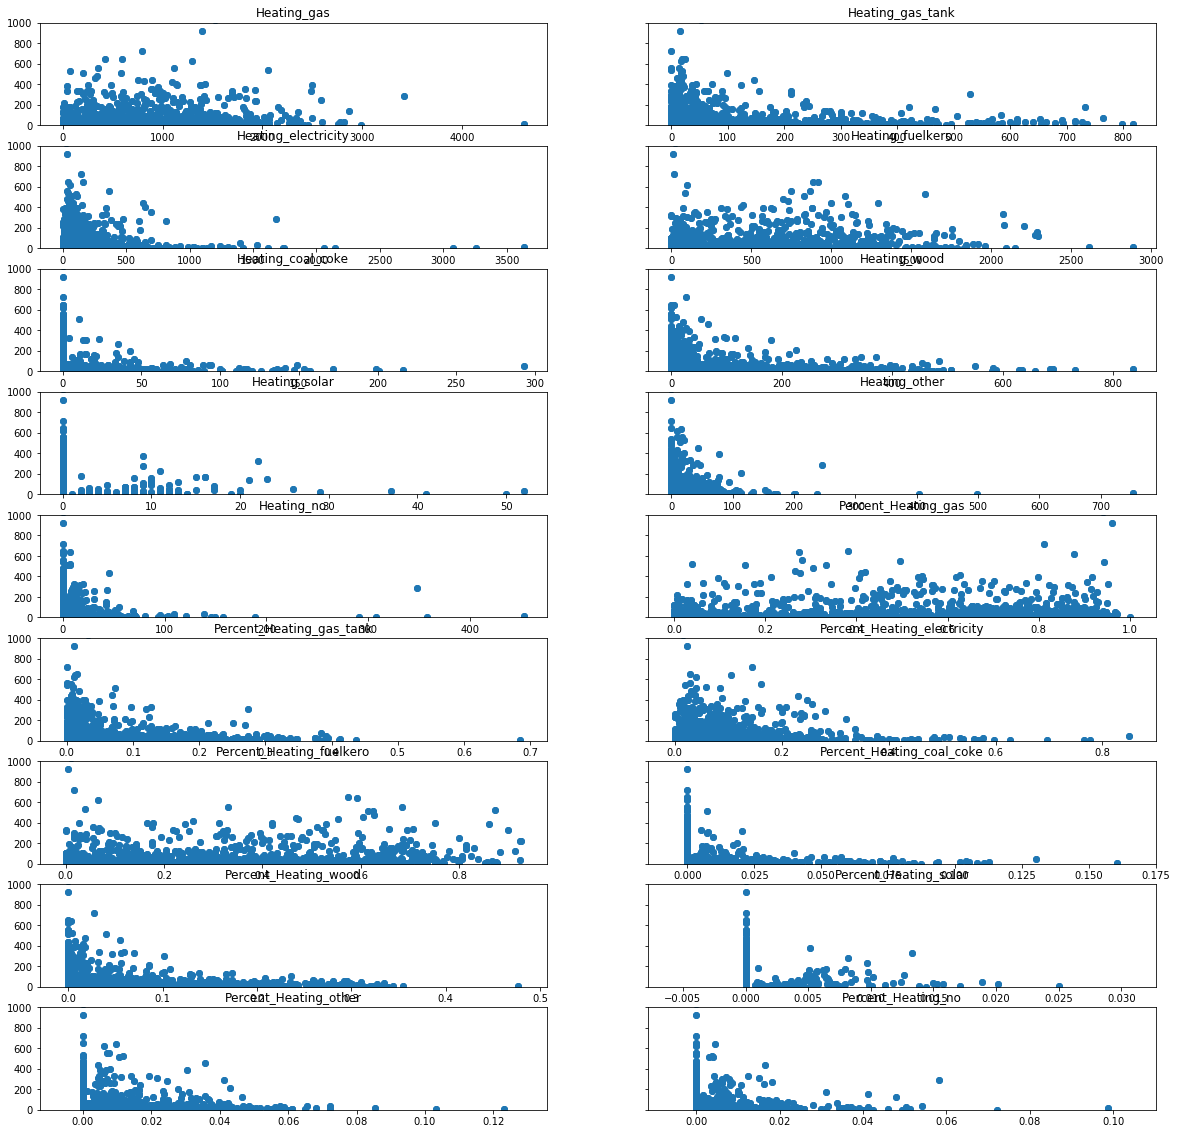

In [40]:
all_heating.pop()
fig, axs = plt.subplots(nrows=9, ncols= 2, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = all_heating[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

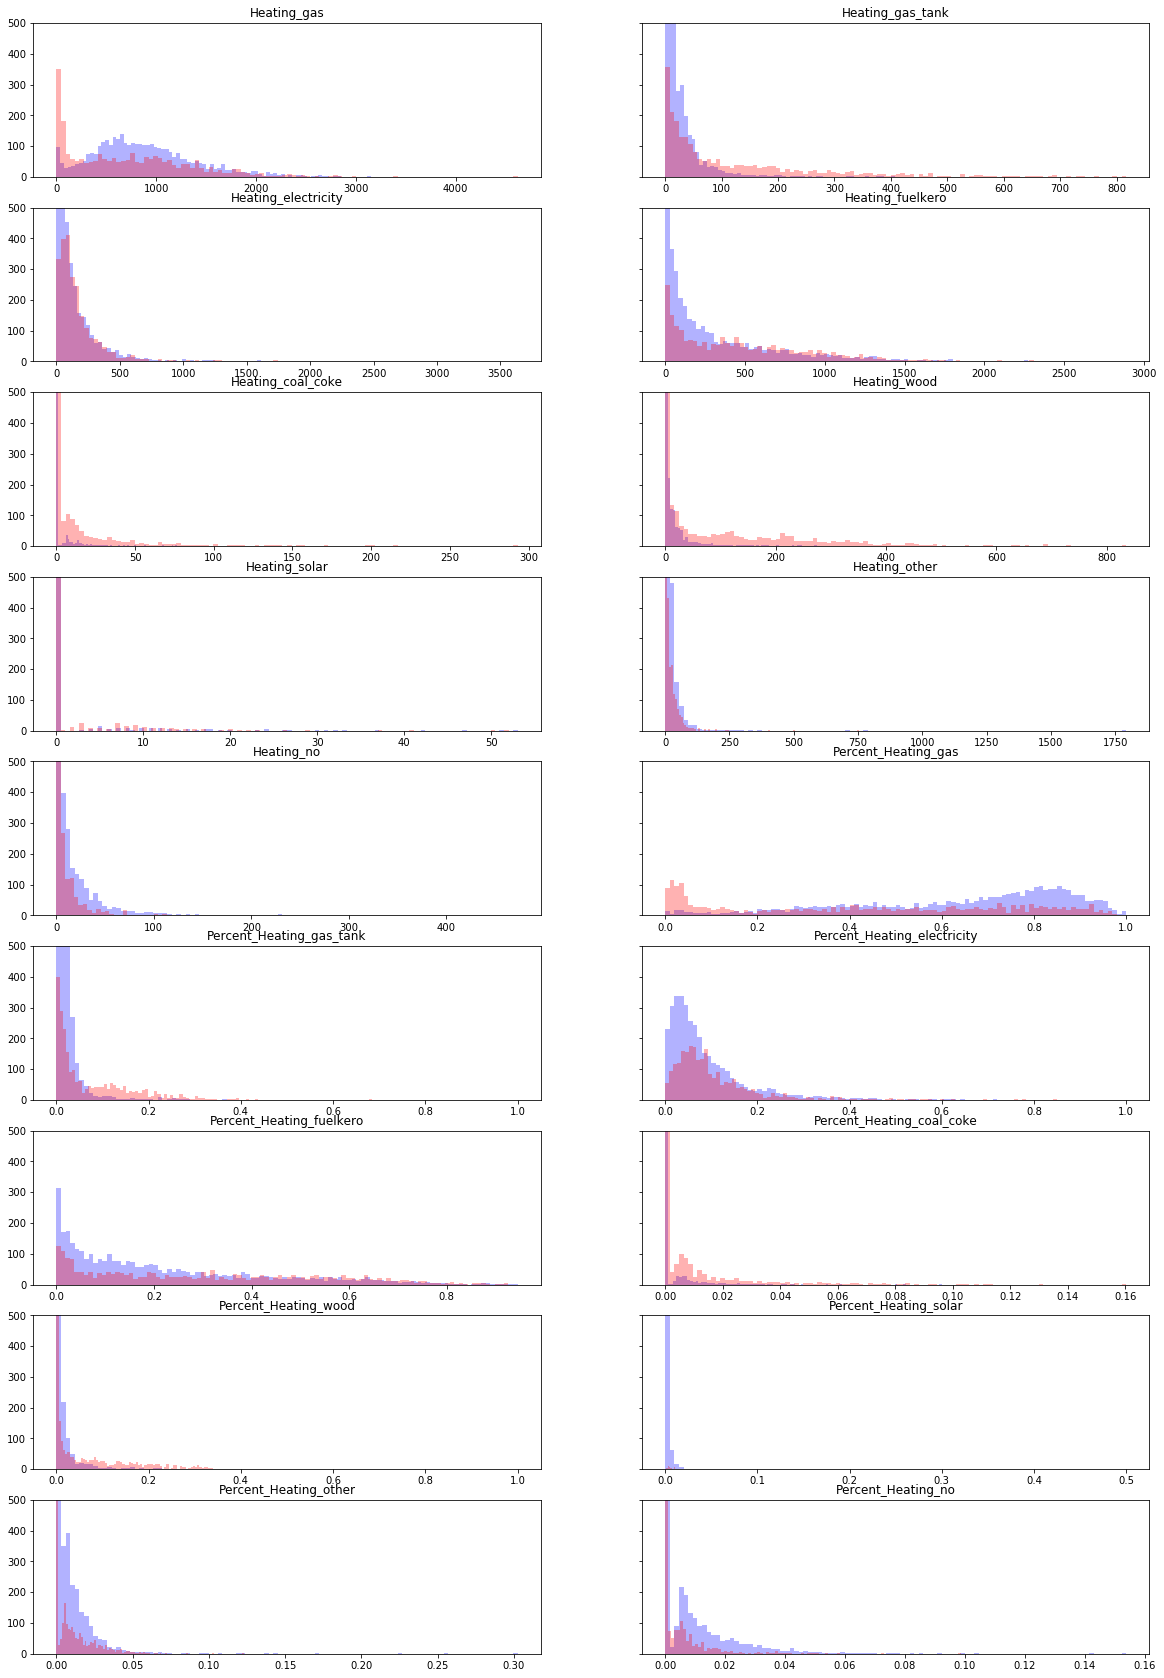

In [41]:

fig, axs = plt.subplots(nrows=9, ncols= 2, sharey=True ,figsize=(20,30))

for i, ax in enumerate(axs.flatten()):
    column = all_heating[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,500);

In [42]:
pd.DataFrame(np.array(acs.columns).reshape(22,7))

ValueError: cannot reshape array of size 155 into shape (22,7)

## Units - Type

In [43]:
all_units = units+units_percent
all_units.append('Project_Number')
all_units.append('10+_units%')
all_units.append('1_unit%')

In [44]:
acs[all_units].corr()['Project_Number']

1_unit_detached            0.067946
1_unit_attached            0.152405
2_units                    0.107746
3_4_units                 -0.049300
5_9_units                 -0.014810
10_19_units               -0.021540
20+_units                 -0.082300
Percent_1_unit_detached    0.081711
Percent_1_unit_attached    0.166908
Percent_2_units            0.105633
Percent_3_4_units         -0.040921
Percent_5_9_units         -0.013775
Percent_10_19_units       -0.005152
Percent_20+_units         -0.101682
Project_Number             1.000000
10+_units%                -0.092721
1_unit%                    0.013639
Name: Project_Number, dtype: float64

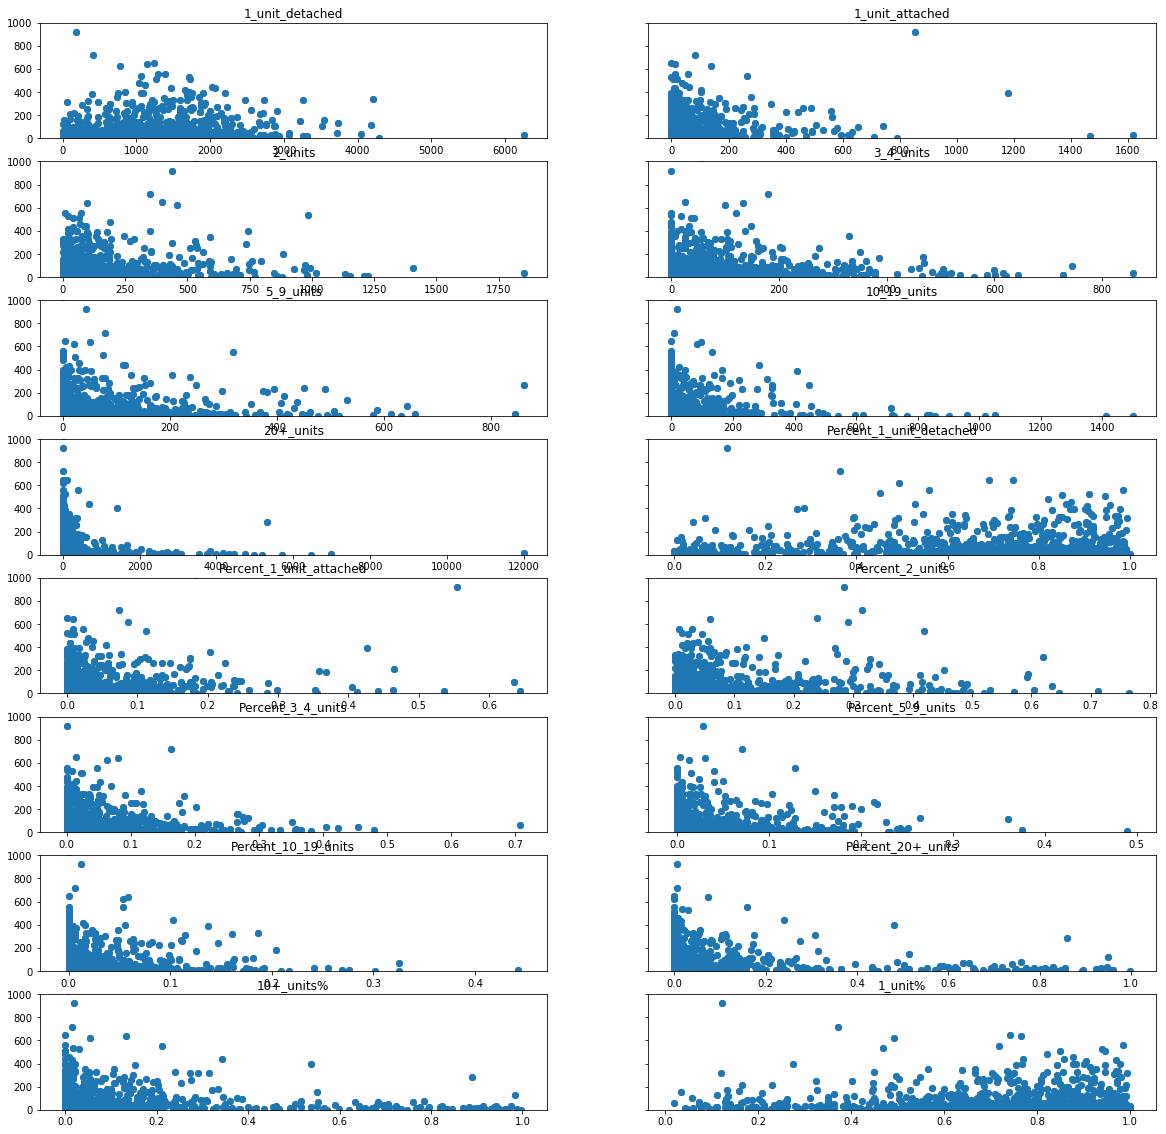

In [45]:
all_units.remove('Project_Number')
fig, axs = plt.subplots(nrows=8, ncols= 2, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = all_units[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

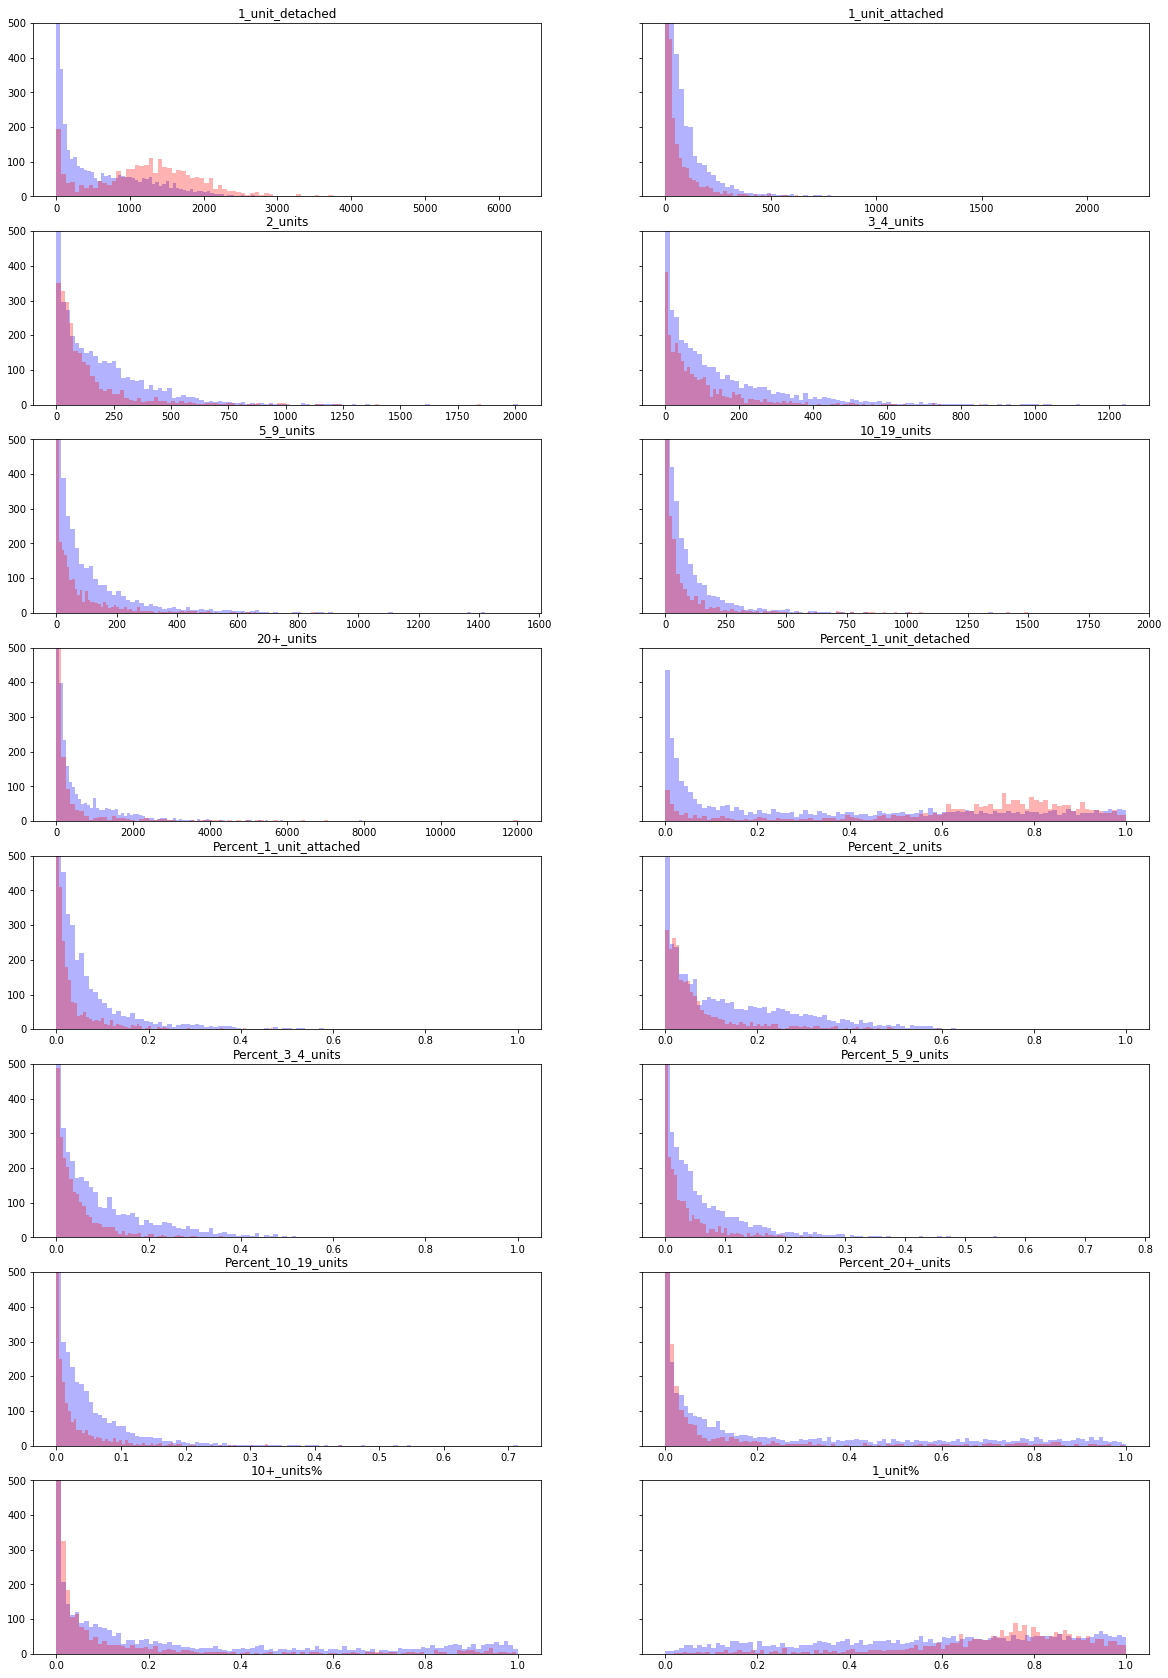

In [46]:

fig, axs = plt.subplots(nrows=8, ncols= 2, sharey=True ,figsize=(20,30))

for i, ax in enumerate(axs.flatten()):
    column = all_units[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,500);

## Projects

In [47]:
projects_char = ['Remote_Net_Metering', 'Project_Cost' ,'cost_Kw', 'Project_Number']

In [48]:
acs[projects_char].corr()['Project_Number']

Remote_Net_Metering    0.224710
Project_Cost          -0.115560
cost_Kw               -0.013596
Project_Number         1.000000
Name: Project_Number, dtype: float64

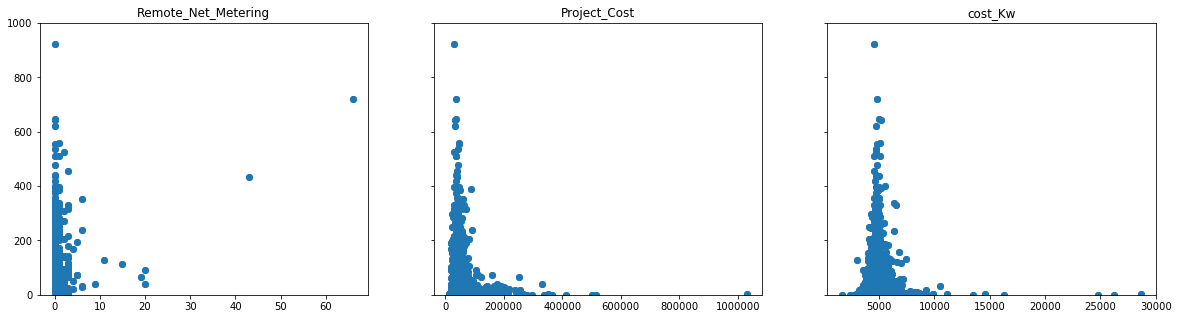

In [49]:
projects_char.remove('Project_Number')
fig, axs = plt.subplots(nrows=1, ncols= 3, sharey=True ,figsize=(20,5))

for i, ax in enumerate(axs.flatten()):
    column = projects_char[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

In [50]:
len(acs['county'].unique())

62

## Project sunroof

In [51]:
sunroof = ['yearly_sunlight_kwh_kw_threshold_avg','count_qualified', 'percent_qualified',
           'number_of_panels_n','number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w',
           'number_of_panels_f','number_of_panels_median', 'number_of_panels_total','kw_median',
           'kw_total','yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_e', 
           'yearly_sunlight_kwh_w', 'yearly_sunlight_kwh_f','yearly_sunlight_kwh_median',
           'yearly_sunlight_kwh_total', 'Project_Number']

In [52]:
acs[sunroof].corr()['Project_Number']

yearly_sunlight_kwh_kw_threshold_avg    0.356684
count_qualified                         0.277403
percent_qualified                       0.069869
number_of_panels_n                      0.120567
number_of_panels_s                      0.205701
number_of_panels_e                      0.239629
number_of_panels_w                      0.227963
number_of_panels_f                      0.005592
number_of_panels_median                -0.103836
number_of_panels_total                  0.111986
kw_median                              -0.103836
kw_total                                0.111986
yearly_sunlight_kwh_n                   0.137434
yearly_sunlight_kwh_s                   0.223081
yearly_sunlight_kwh_e                   0.252600
yearly_sunlight_kwh_w                   0.242816
yearly_sunlight_kwh_f                   0.014511
yearly_sunlight_kwh_median             -0.093552
yearly_sunlight_kwh_total               0.124184
Project_Number                          1.000000
Name: Project_Number

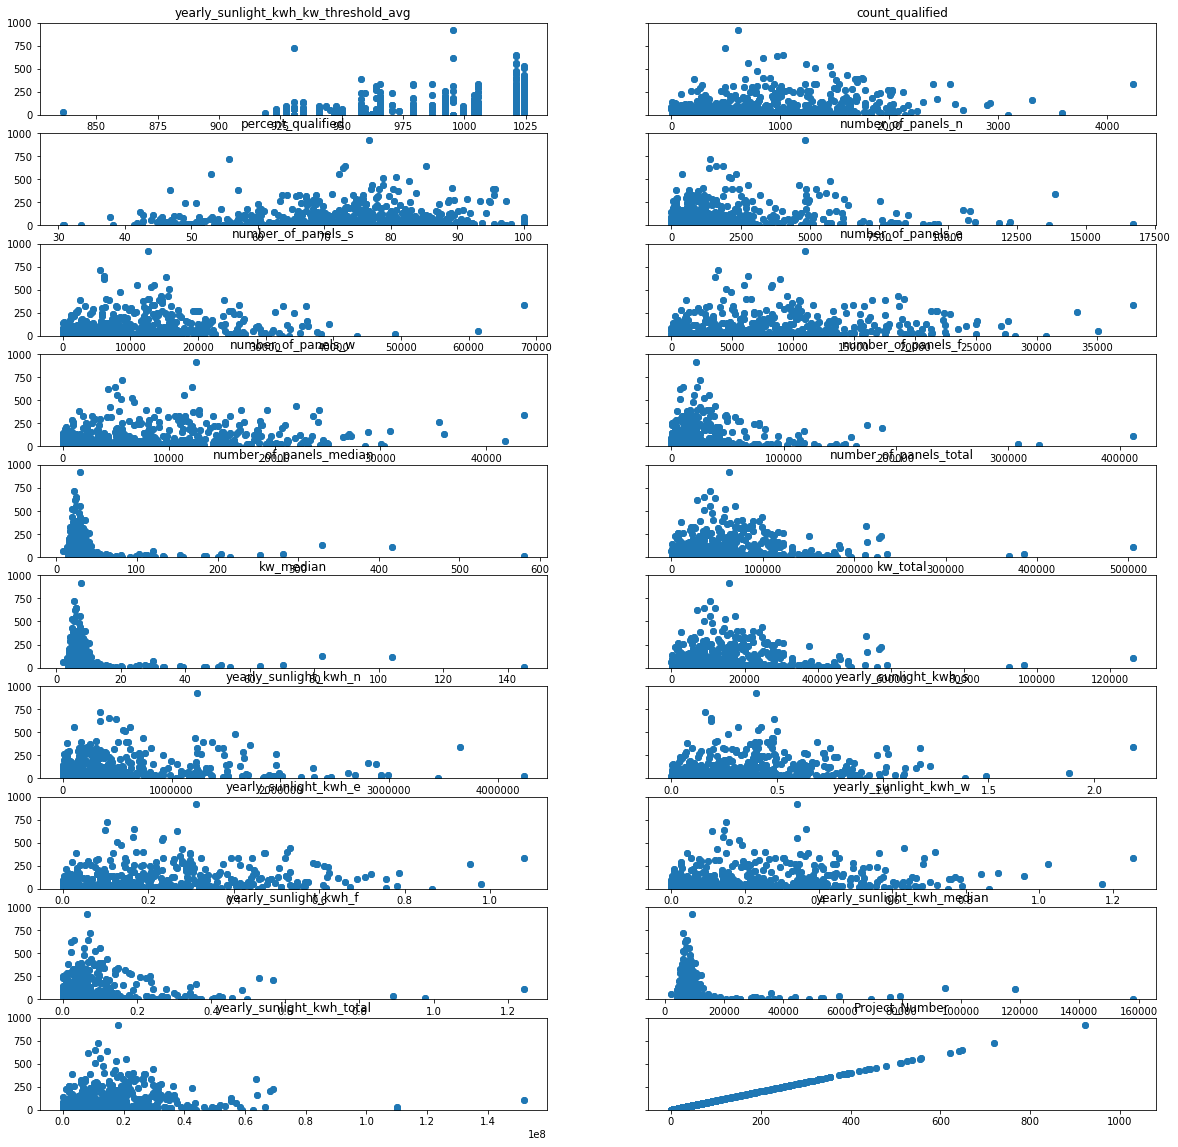

In [53]:
fig, axs = plt.subplots(nrows=10, ncols= 2, sharey=True ,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    column = sunroof[i]
    ax.scatter(acs[column], acs['Project_Number'])
    ax.set_title('{}'.format(column))
    ax.set_ylim(0,1000)

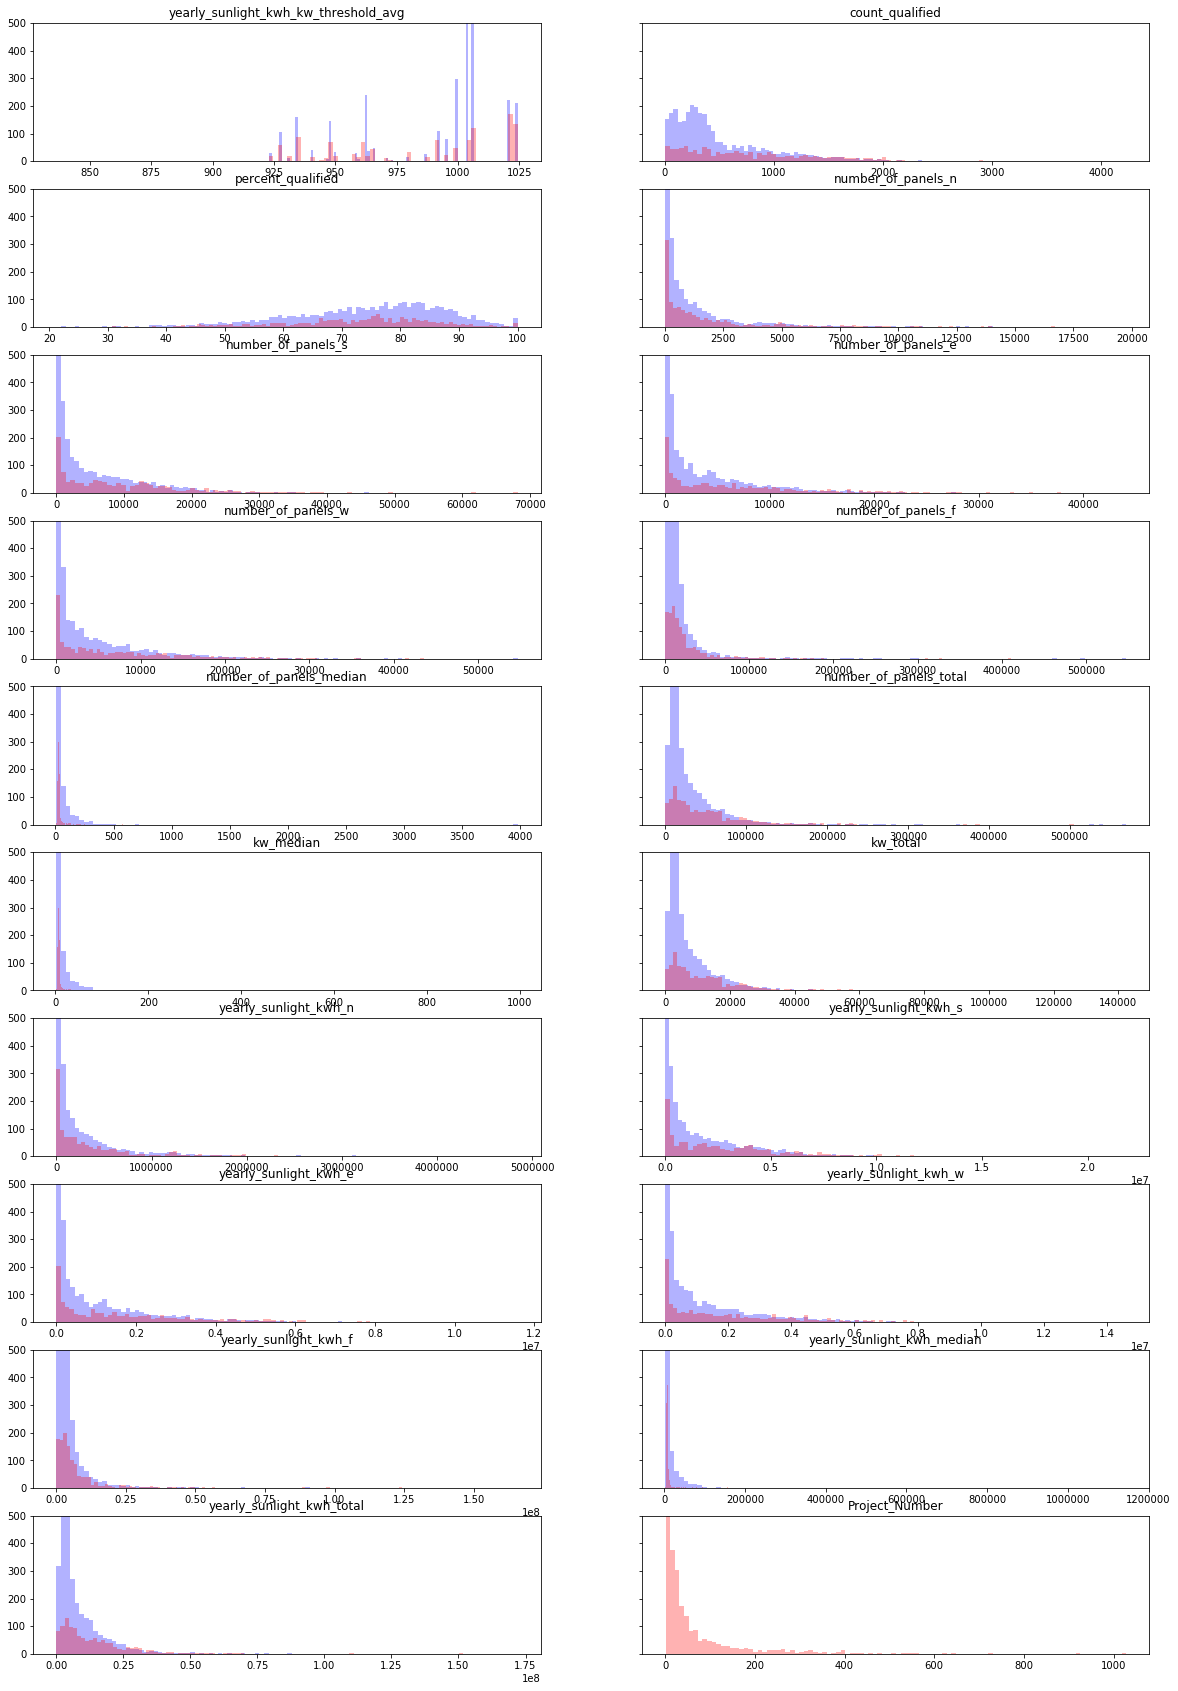

In [54]:
fig, axs = plt.subplots(nrows=10, ncols= 2, sharey=True ,figsize=(20,30))

for i, ax in enumerate(axs.flatten()):
    column = sunroof[i] 
    ax.hist(temp[column].dropna(), alpha=0.3, color='blue', bins=100)
    ax.hist(temp1[column].dropna(), alpha=0.3, color='red', bins=100)
    ax.set_title('{}'.format(column));
    ax.set_ylim(0,500);

## First model with ALL variables, including income

In [52]:
group_lst= [all_educ,all_heating, all_income,all_rooms,all_units,other_households, sunroof]
for i in group_lst:
    if 'Project_Number' in i:
        i.remove('Project_Number')
    if 'Project_yes' in i:
        i.remove('Project_yes')

In [53]:
all_variables = all_educ + all_heating + all_income + all_rooms + all_units + other_households + sunroof
all_variables.append('Project_yes')
X=acs[all_variables].dropna()
y=X['Project_yes']
X=X.drop('Project_yes', axis=1)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=800, subsample=0.5, learning_rate=0.05)
search = GridSearchCV(model, param_grid = {'max_depth': [2,3,4,5,6,7,8]}, 
             scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, 
             cv=None, verbose=10, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)

In [55]:
fitted = model.fit(X,y)

In [56]:
fitted.score(X,y)

0.97586767895878523

In [57]:
probs = pd.DataFrame(fitted.predict_proba(X))

In [58]:
probs = pd.concat([y, probs], axis=1)
probs['proba']=probs[1]

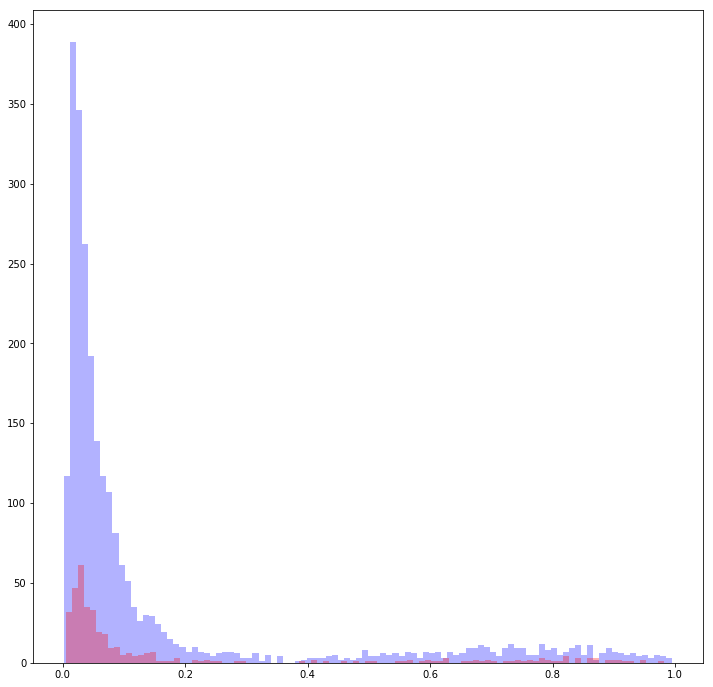

In [59]:
temp_0 = probs[probs['Project_yes']==0]
temp_1 = probs[probs['Project_yes']==1]
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp_0['proba'].dropna(), alpha=0.3, color='blue', bins=100)
ax.hist(temp_1['proba'].dropna(), alpha=0.3, color='red', bins=100);

In [60]:
fitted.get_params

<bound method GradientBoostingClassifier.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=800, presort='auto', random_state=None,
              subsample=0.5, verbose=0, warm_start=False)>

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
fitted = model.fit(X_train,y_train)

In [63]:
fitted.score(X_test, y_test)

0.83739837398373984

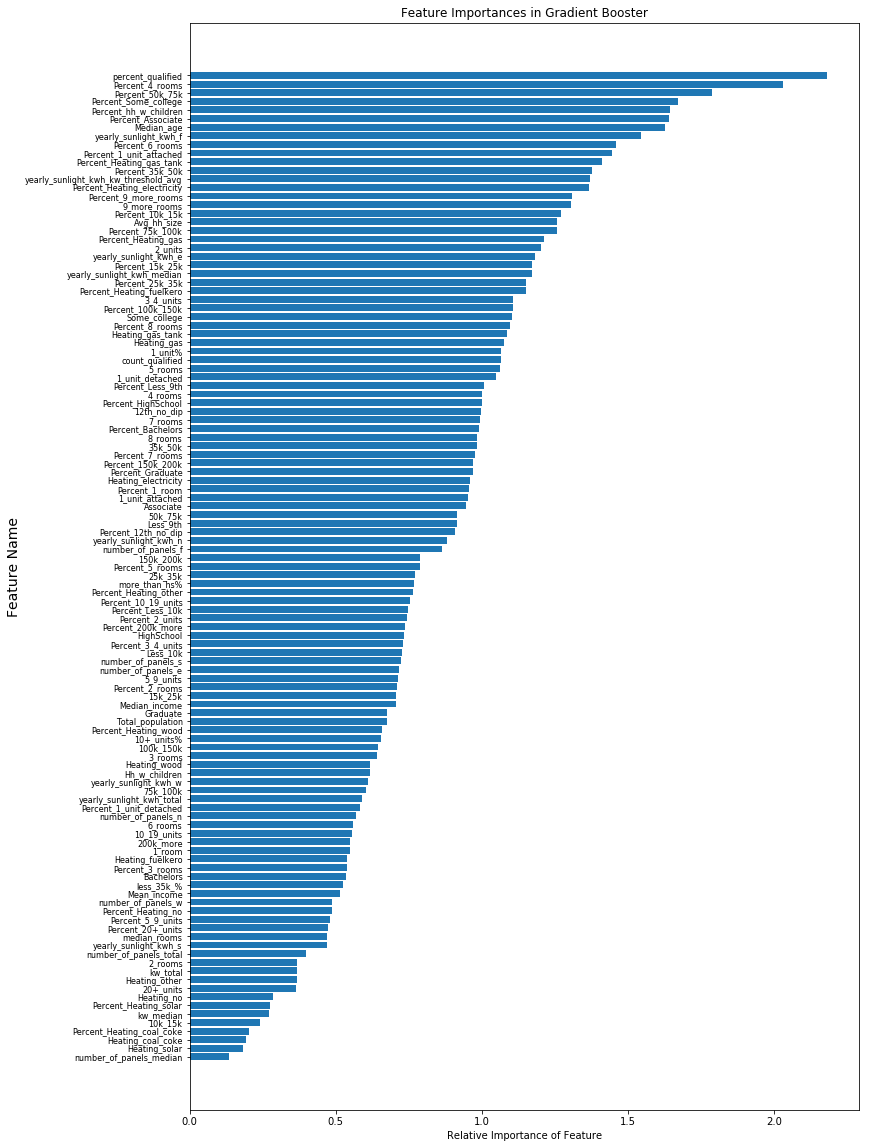

In [82]:
feature_importances = 100*fitted.feature_importances_ / np.sum(fitted.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, list(X.columns), range(len(X.columns)))))

width = 0.8

idx = np.arange(len(X.columns))

fig, ax = plt.subplots(figsize=(12,20))
ax.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names, fontsize=8)

ax.set_title("Feature Importances in Gradient Booster")
ax.set_xlabel('Relative Importance of Feature', fontsize=10)
ax.set_ylabel('Feature Name', fontsize=14)

## Model excluding income

In [85]:
all_variables = all_educ + all_heating + all_rooms + all_units + other_households + sunroof
all_variables.append('Project_yes')
X=acs[all_variables].dropna()
y=X['Project_yes']
X=X.drop('Project_yes', axis=1)

In [139]:
model = GradientBoostingClassifier()
search = GridSearchCV(model, param_grid = {'n_estimators' : [300,500, 1000], 'subsample' :[0.3,0.5,0.8],
                                           'max_depth': [2,3,4,5,6,7,8], 'learning_rate' : [0.1, 0.05, 0.01, 0.001]}, 
             scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, 
             cv=None, verbose=5, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
fitted = model.fit(X_train,y_train)

In [142]:
fitted.score(X_test, y_test)

0.85148514851485146

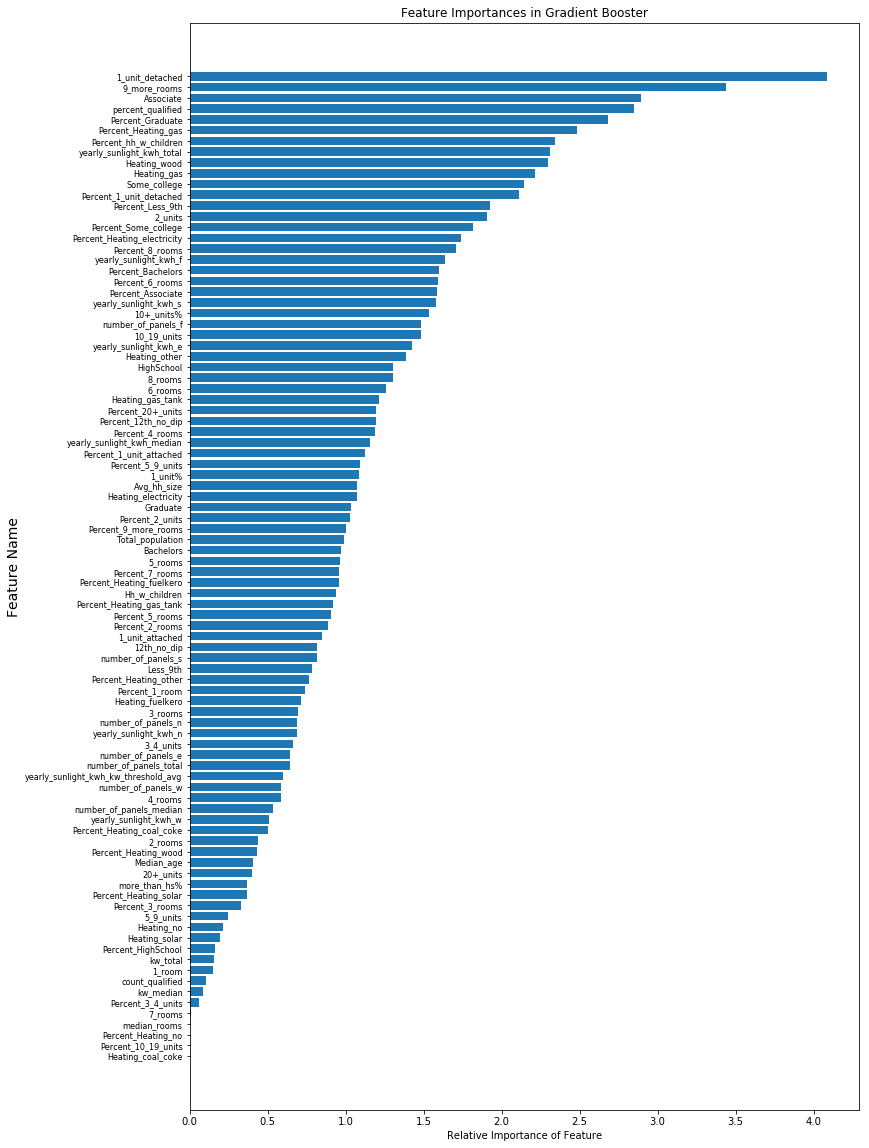

In [143]:
feature_importances = 100*fitted.feature_importances_ / np.sum(fitted.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, list(X.columns), range(len(X.columns)))))

width = 0.8

idx = np.arange(len(X.columns))

fig, ax = plt.subplots(figsize=(12,20))
ax.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names, fontsize=8)

ax.set_title("Feature Importances in Gradient Booster")
ax.set_xlabel('Relative Importance of Feature', fontsize=10)
ax.set_ylabel('Feature Name', fontsize=14)

## Model including only percentage data

In [19]:
all_variables = education_percent + heating_percent + rooms_percent + units_percent + other_households + sunroof
all_variables.append('Project_yes')
X=acs[all_variables].dropna()
y=X['Project_yes']
X=X.drop('Project_yes', axis=1)

NameError: name 'other_households' is not defined

In [146]:
model = GradientBoostingClassifier()
search = GridSearchCV(model, param_grid = {'n_estimators' : [300,500, 1000], 'subsample' :[0.3,0.5,0.8],
                                           'max_depth': [2,3,4,5,6,7,8], 'learning_rate' : [0.1, 0.05, 0.01, 0.001]}, 
             scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, 
             cv=None, verbose=5, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
fitted = model.fit(X_train,y_train)

In [149]:
fitted.score(X_test, y_test)

0.85982142857142863

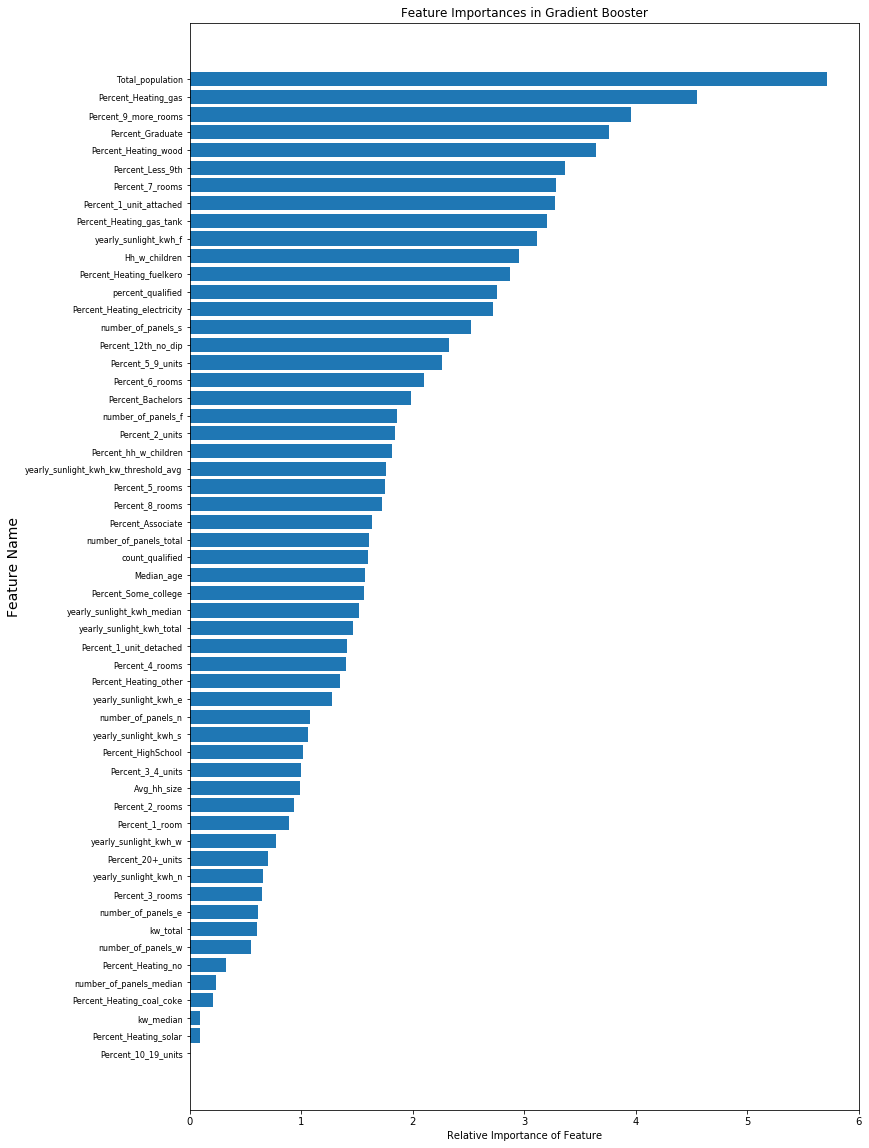

In [150]:
feature_importances = 100*fitted.feature_importances_ / np.sum(fitted.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, list(X.columns), range(len(X.columns)))))

width = 0.8

idx = np.arange(len(X.columns))

fig, ax = plt.subplots(figsize=(12,20))
ax.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names, fontsize=8)

ax.set_title("Feature Importances in Gradient Booster")
ax.set_xlabel('Relative Importance of Feature', fontsize=10)
ax.set_ylabel('Feature Name', fontsize=14)

## Getting prices

In [55]:
prices = pd.read_csv('input/2016-todate.csv')
prices['Mean_price'] = 'Mean_price'
prices['Var_price'] = 'Var_price'

In [57]:
mean_prices = pd.crosstab(index=prices['Zone Name'], columns= prices['Mean_price'], 
                             values = prices['DAM Zonal LBMP'], aggfunc=np.mean)

In [58]:
var_prices = pd.crosstab(index=prices['Zone Name'], columns= prices['Var_price'], 
                             values = prices['DAM Zonal LBMP'], aggfunc=np.var)

In [59]:
zone_prices = pd.concat([mean_prices,var_prices], axis=1)

In [60]:
zone_prices

,Mean_price,Var_price
Zone Name,,
CAPITL,29.951927,195.928370
CENTRL,22.462457,103.019352
DUNWOD,29.881834,170.939219
GENESE,21.520214,95.553107
H Q,18.304424,97.683015
HUD VL,29.457167,163.361579
LONGIL,35.571604,477.108098
MHK VL,22.601923,103.146785
MILLWD,29.826102,172.698160


In [61]:
zones = {'WEST': ['Chautauqua', 'Cattaraugus', 'Erie', 'Niagara', 'Orleans', 'Genesee', 'Wyoming', 'Livingston'], 
        'GENESE': ['Allegany', 'Monroe', 'Wayne', 'Ontario'], 
        'CENTRL': ['Steuben', 'Yates', 'Seneca', 'Gayuga', 'Schuyler', 'Chemung','Tioga', 'Tompkins', 'Cortland',
               'Broome','Onondaga','Oswego'],
        'NORTH': ['Clinton'],
        'MHK VL': ['Jefferson', 'St. Lawrence', 'Franklin', 'Lewis', 'Oneida', 'Herkimer', 'Madison', 'Otsego',
             'Chenango', 'Delaware', 'Sullivan'], 
        'CAPITL': ['Essex', 'Hamilton', 'Warren', 'Washington', 'Saratoga', 'Fulton', 'Montgomery', 'Schenectady', 
             'Schoharie', 'Albany', 'Rensselaer', 'Columbia'],
         'HUD VL': ['Greene', 'Dutchess', 'Ulster', 'Orange', 'Putnam', 'Rockland'],
         'DUNWOD': ['Westchester'],
         'N.Y.C.': ['Bronx', 'Kings', 'Queens', 'New York', 'Bronx','Richmond'],
         'LONGIL': ['Nassau', 'Suffolk'] }

In [62]:
df_zones = pd.DataFrame([{'Region': k , 'County': value} for k, v in zones.items() for value in v])

In [63]:
df_county_names =pd.DataFrame(county_names.items(), columns=['county', 'county_name']) 

In [64]:
prices = df_zones.merge(zone_prices, left_on='Region', right_index=True, how='left')

In [65]:
prices_with_codes = prices.merge(df_county_names, left_on='County', right_on='county_name', how='outer')

In [66]:
prices_with_codes.drop(['County'],axis=1)

,Region,Mean_price,Var_price,county,county_name
0,NORTH,18.309167,95.470254,019,Clinton
1,LONGIL,35.571604,477.108098,059,Nassau
2,LONGIL,35.571604,477.108098,103,Suffolk
3,GENESE,21.520214,95.553107,003,Allegany
4,GENESE,21.520214,95.553107,055,Monroe
5,GENESE,21.520214,95.553107,117,Wayne
6,GENESE,21.520214,95.553107,069,Ontario
7,N.Y.C.,30.932676,188.915562,005,Bronx
8,N.Y.C.,30.932676,188.915562,005,Bronx
9,N.Y.C.,30.932676,188.915562,047,Kings


In [67]:
df_with_prices = acs.merge(prices_with_codes, left_on='county', right_on='county', how='left')

In [68]:
df_with_prices.head()

,12th_no_dip,Some_college,Total_households_by_type,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,...,Percent_Heating_wood,Percent_Heating_solar,Percent_Heating_other,Percent_Heating_no,weight,County,Region,Mean_price,Var_price,county_name
0,264,579,2006,26337.0,220,78,59,2758,2.21,420,...,0.00000,0.0,0.000000,0.014955,1990.0,Albany,CAPITL,29.951927,195.92837,Albany
1,218,512,2311,32244.0,422,214,29,3421,2.19,297,...,0.00000,0.0,0.000000,0.023367,2310.0,Albany,CAPITL,29.951927,195.92837,Albany
2,188,389,1687,29431.0,360,67,25,2290,2.17,352,...,0.00652,0.0,0.000000,0.005335,1656.0,Albany,CAPITL,29.951927,195.92837,Albany
3,73,154,691,16083.0,183,30,33,1057,1.44,43,...,0.00000,0.0,0.005789,0.007236,660.0,Albany,CAPITL,29.951927,195.92837,Albany
4,70,608,1970,60743.0,901,213,143,3321,2.40,333,...,0.00000,0.0,0.006091,0.005076,1847.0,Albany,CAPITL,29.951927,195.92837,Albany


In [ ]:
df_with_prices.w

## Model with prices

In [101]:
group_lst= [education_percent, heating_percent, rooms_percent, units_percent, other_households, sunroof]
for i in group_lst:
    if 'Project_Number' in i:
        i.remove('Project_Number')
    if 'Project_yes' in i:
        i.remove('Project_yes')

In [121]:
sum(df_with_prices.Pop_over_25==0)

1

In [118]:
df_with_prices.loc[df_with_prices['weight']<0, ['households','tract','Project_Number']]

,households,tract,Project_Number
65,41,028400,66.0
66,41,028400,66.0
341,0,080800,49.0
985,32,158007,113.0


In [103]:
all_variables = education_percent + heating_percent + rooms_percent + units_percent + other_households + sunroof
all_variables.append('Project_yes')
all_variables.append('Mean_price')
all_variables.append('Var_price')
all_variables.append('weight')
X=df_with_prices[all_variables].dropna()
X.describe()

,Percent_Less_9th,Percent_12th_no_dip,Percent_HighSchool,Percent_Some_college,Percent_Associate,Percent_Bachelors,Percent_Graduate,Percent_Heating_gas,Percent_Heating_gas_tank,Percent_Heating_electricity,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,Project_yes,Mean_price,Var_price,weight
count,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,...,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4672.000000,4672.000000,4672.000000,4672.000000
mean,0.077824,0.084937,0.262077,0.161461,0.080091,0.191643,0.141968,0.606222,0.020616,0.092380,...,1.738573e+06,1.055262e+06,1.177522e+06,5.217506e+06,1.040008e+04,9.453488e+06,0.265411,30.123912,226.326374,1306.961045
std,0.072279,0.060855,0.094462,0.052397,0.037825,0.094458,0.112734,0.246269,0.032011,0.099263,...,2.313225e+06,1.480341e+06,1.679557e+06,8.729215e+06,2.061504e+04,1.207687e+07,0.441599,3.792166,113.277817,921.990996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.178341e+03,2.178341e+03,0.000000,18.309167,95.470254,-81.000000
25%,0.022025,0.035856,0.205937,0.125232,0.052549,0.119785,0.056282,0.411156,0.005402,0.032465,...,1.075191e+05,6.125771e+04,4.974456e+04,1.668607e+06,5.862569e+03,2.798255e+06,0.000000,29.951927,188.915562,704.750000
50%,0.054113,0.071541,0.269475,0.161405,0.077373,0.179058,0.112298,0.659880,0.012836,0.062741,...,6.952734e+05,3.269094e+05,3.653015e+05,3.007091e+06,7.265926e+03,4.888006e+06,0.000000,30.932676,188.915562,1233.000000
75%,0.113622,0.120735,0.324606,0.195367,0.103234,0.248030,0.195305,0.814980,0.024401,0.115981,...,2.682345e+06,1.547192e+06,1.742389e+06,5.228944e+06,9.005802e+03,1.225103e+07,1.000000,30.932676,195.928370,1785.000000
max,0.445956,0.356589,0.666667,0.448276,0.250000,0.590695,0.695565,1.000000,0.502591,0.914928,...,2.182572e+07,1.157912e+07,1.461371e+07,1.657917e+08,1.144766e+06,1.720241e+08,1.000000,35.571604,477.108098,12305.000000


In [104]:
y=X['Project_yes']
weights=X['weight']
X=X.drop(['Project_yes', 'weight'], axis=1)

In [99]:
X.describe()

,Percent_Less_9th,Percent_12th_no_dip,Percent_HighSchool,Percent_Some_college,Percent_Associate,Percent_Bachelors,Percent_Graduate,Percent_Heating_gas,Percent_Heating_gas_tank,Percent_Heating_electricity,...,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,Project_Number,Project_yes,Mean_price,Var_price,weight
count,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6384.000000,6384.000000,6384.000000,...,4.695000e+03,4.695000e+03,4.695000e+03,4.695000e+03,4.695000e+03,2440.000000,6413.000000,6413.000000,6413.000000,6413.000000
mean,0.066762,0.082026,0.279446,0.167097,0.087928,0.180069,0.136672,0.549479,0.041504,0.096065,...,1.051309e+06,1.173024e+06,5.220881e+06,1.054030e+04,9.441802e+06,64.659836,0.380477,29.104385,208.772863,1208.043194
std,0.067018,0.058247,0.099251,0.054883,0.042699,0.092289,0.107768,0.285448,0.067130,0.097573,...,1.477906e+06,1.676799e+06,8.733429e+06,2.077220e+04,1.207318e+07,101.011773,0.485542,4.122191,106.346977,913.515748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.178341e+03,2.178341e+03,1.000000,0.000000,18.309167,95.470254,-81.000000
25%,0.019978,0.038699,0.220176,0.133780,0.057810,0.110816,0.059909,0.329859,0.006384,0.036159,...,6.124053e+04,4.973550e+04,1.665805e+06,5.864894e+03,2.781642e+06,11.000000,0.000000,25.463787,163.361579,577.000000
50%,0.041296,0.069580,0.285714,0.167567,0.085286,0.166080,0.106985,0.608793,0.016016,0.068247,...,3.247734e+05,3.643438e+05,3.004957e+06,7.283257e+03,4.884711e+06,26.000000,0.000000,30.932676,188.915562,1180.000000
75%,0.093286,0.111181,0.348892,0.198574,0.114904,0.233894,0.181004,0.798320,0.038172,0.120158,...,1.544905e+06,1.729798e+06,5.229965e+06,9.061672e+03,1.221502e+07,70.000000,1.000000,30.932676,195.928370,1723.000000
max,0.445956,0.535254,0.793103,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.157912e+07,1.461371e+07,1.657917e+08,1.144766e+06,1.720241e+08,1028.000000,1.000000,35.571604,477.108098,12305.000000


In [105]:
model = GradientBoostingClassifier()
search = GridSearchCV(model, param_grid = {'n_estimators' : [300,500, 1000], 'subsample' :[0.3,0.5,0.8],
                                           'max_depth': [2,3,4,5,6,7,8], 'learning_rate' : [0.1, 0.05, 0.01, 0.001]}, 
             scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, 
             cv=None, verbose=5, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)

In [106]:
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.3, random_state=42)

In [107]:
fitted = model.fit(X_train,y_train, sample_weight=weights_train)

In [108]:
fitted.score(X_test, y_test)

0.77817403708987165

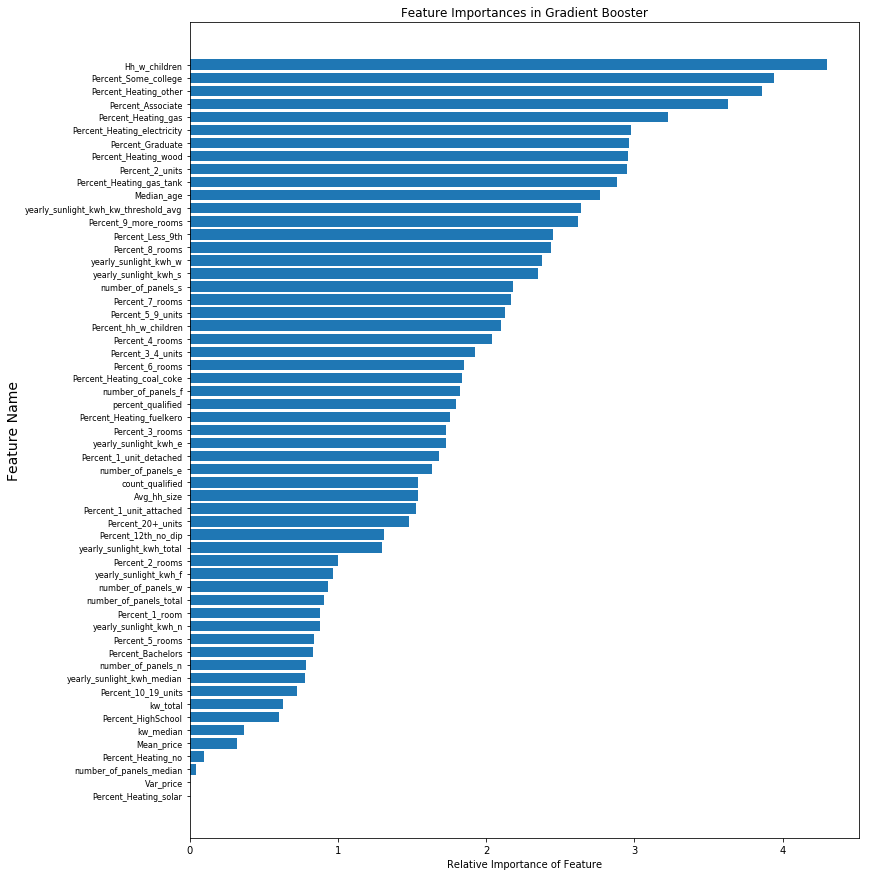

In [125]:
feature_importances = 100*fitted.feature_importances_ / np.sum(fitted.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, list(X.columns), range(len(X.columns)))))

width = 0.8

idx = np.arange(len(X.columns))

fig, ax = plt.subplots(figsize=(12,15))
ax.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names, fontsize=8)

ax.set_title("Feature Importances in Gradient Booster")
ax.set_xlabel('Relative Importance of Feature', fontsize=10)
ax.set_ylabel('Feature Name', fontsize=14)
fig.savefig('feat_imp_sep8.png')